In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
file_path = 'GlobalBurnsRegistry  ENG_5192025.xlsx'

try:
    burn_df = pd.read_excel(file_path, keep_default_na=False, na_values=[''])
    print(burn_df.head()) # Display the first few rows
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the XLS file: {e}")



/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


             Submitted WHO Regions World Bank Income Region (2016) Country  \
0  2022-08-29 08:33:30       SEARO             Lower middle income   India   
1  2022-08-29 08:17:47       SEARO             Lower middle income   India   
2  2022-08-29 08:11:53       SEARO             Lower middle income   India   
3  2022-08-29 07:52:53       SEARO             Lower middle income   India   
4  2022-08-29 07:42:16       SEARO             Lower middle income   India   

       City Respondent  Age at the time of burn injury     Sex  \
0  Guwahati    Patient                            25.0    Male   
1  Guwahati    Patient                            36.0    Male   
2  Guwahati    Patient                            21.0    Male   
3  Guwahati    Patient                            41.0  Female   
4  Guwahati    Patient                            30.0    Male   

  Birthdate known Supervision  ...  \
0              No         NaN  ...   
1              No         NaN  ...   
2              No   

In [ ]:
burn_df.shape

(9279, 64)

In [ ]:
burn_df.columns

Index(['Submitted', 'WHO Regions', 'World Bank Income Region (2016)',
       'Country', 'City', 'Respondent', 'Age at the time of burn injury',
       'Sex', 'Birthdate known', 'Supervision', 'Burn surface area',
       'Smoke injury', 'Associated Injuries', 'Head and Neck', 'Trunk', 'Arm',
       'Hand and wrists', 'Legs', 'Cause of burn', 'Setting', 'RelatedTo',
       '(  ✔ Flame) Involving combustion of:',
       '(  ✔ Occupational )  Type of occupation:',
       '(  ✔ Cooking/food preparation) Burn caused by contact with:',
       '(  ✔ Cooking/food preparation) Burn involved:',
       '(  ✔ Cooking/food preparation) Fuel used for cooking:',
       '(  ✔ Cooking/food preparation) Details of cooking area - Cooking area height (to ground):',
       '(  ✔ Cooking/food preparation) Cooking and living areas separate',
       '(  ✔ Household lighting) Burn caused by:',
       '(  ✔ Household lighting) Type of lamp/lantern used:',
       '(  ✔ Household heating) Burn caused by:',
       

In [ ]:
burn_df['Condition on discharge from facility:'].value_counts()

,count
Condition on discharge from facility:,
Discharged home without physical impairment,5880
Dead,1751
Discharged home with physical impairment,742
Left against medical advice,668
Unknown,145
Transferred to another facility,91


In [ ]:
# Categorize ages
burn_df['age_category'] = pd.cut(burn_df['Age at the time of burn injury'], bins=[-float('inf'), 17, float('inf')], labels=['0-18', '18 and above'])

# Count occurrences in each category
age_category_counts = burn_df['age_category'].value_counts().reset_index()
age_category_counts.columns = ['Age Category', 'Count']

print("\nAge Category Counts:")
age_category_counts


Age Category Counts:


,Age Category,Count
0,18 and above,5517
1,0-18,3759


In [ ]:
#Data with age 18 and above only

burn_df_fil = burn_df[burn_df['age_category'] == '18 and above'].copy()

print("\nDataFrame with age 18 and above:")
print(burn_df_fil.head())
print("\nShape of DataFrame with age 18 and above:", burn_df_fil.shape)


DataFrame with age 18 and above:
             Submitted WHO Regions World Bank Income Region (2016) Country  \
0  2022-08-29 08:33:30       SEARO             Lower middle income   India   
1  2022-08-29 08:17:47       SEARO             Lower middle income   India   
2  2022-08-29 08:11:53       SEARO             Lower middle income   India   
3  2022-08-29 07:52:53       SEARO             Lower middle income   India   
4  2022-08-29 07:42:16       SEARO             Lower middle income   India   

       City Respondent  Age at the time of burn injury     Sex  \
0  Guwahati    Patient                            25.0    Male   
1  Guwahati    Patient                            36.0    Male   
2  Guwahati    Patient                            21.0    Male   
3  Guwahati    Patient                            41.0  Female   
4  Guwahati    Patient                            30.0    Male   

  Birthdate known Supervision  ...  \
0              No         NaN  ...   
1              No       

In [ ]:
burn_df_fil.isnull().sum()

,0
Submitted,0
WHO Regions,0
World Bank Income Region (2016),0
Country,0
City,0
...,...
Specialist capabilities,0
Specialized treatment unit,0
UrbanRural,0
Wound care capabilities,0


In [ ]:
burn_df_fil.columns

Index(['Submitted', 'WHO Regions', 'World Bank Income Region (2016)',
       'Country', 'City', 'Respondent', 'Age at the time of burn injury',
       'Sex', 'Birthdate known', 'Supervision', 'Burn surface area',
       'Smoke injury', 'Associated Injuries', 'Head and Neck', 'Trunk', 'Arm',
       'Hand and wrists', 'Legs', 'Cause of burn', 'Setting', 'RelatedTo',
       '(  ✔ Flame) Involving combustion of:',
       '(  ✔ Occupational )  Type of occupation:',
       '(  ✔ Cooking/food preparation) Burn caused by contact with:',
       '(  ✔ Cooking/food preparation) Burn involved:',
       '(  ✔ Cooking/food preparation) Fuel used for cooking:',
       '(  ✔ Cooking/food preparation) Details of cooking area - Cooking area height (to ground):',
       '(  ✔ Cooking/food preparation) Cooking and living areas separate',
       '(  ✔ Household lighting) Burn caused by:',
       '(  ✔ Household lighting) Type of lamp/lantern used:',
       '(  ✔ Household heating) Burn caused by:',
       

In [ ]:
selected_features = [
    'Age at the time of burn injury',         # age of patient
    'Sex',         # gender
    'Burn surface area',     # total body surface area burned
    'Smoke injury',    # inhalation injury
    'Associated Injuries', # Anyother injury because of smoke
    'Head and Neck',
    'Trunk',
    'Arm',
    'Hand and wrists',
    'Legs',
    'Cause of burn',
    'RelatedTo',
    'Contributing factors',
    # 'Surgery during this hospital stay',
    # 'Hospital stay duration days',
    'Pre-hospital duration hours',
    'Condition on discharge from facility:',  # Target Column

]


In [ ]:
final_df = burn_df_fil[selected_features].copy()

print("\nFinal DataFrame with selected features:")
print(final_df.head())
print("\nShape of the final DataFrame:", final_df.shape)


Final DataFrame with selected features:
   Age at the time of burn injury     Sex  Burn surface area Smoke injury  \
0                            25.0    Male               30.0           No   
1                            36.0    Male               10.0           No   
2                            21.0    Male               15.0           No   
3                            41.0  Female               15.0           No   
4                            30.0    Male               10.0           No   

  Associated Injuries Head and Neck                           Trunk  \
0                None     Face;Neck  Chest,abdomen,back or buttocks   
1                None     Face;Neck                            None   
2                None     Face;Neck  Chest,abdomen,back or buttocks   
3                None          None  Chest,abdomen,back or buttocks   
4                None          Face                            None   

                                               Arm Hand and wrists  \

In [ ]:
# Calculate missing value percentages for these features
missing_selected = final_df.isnull().mean().reset_index()
missing_selected.columns = ['feature', 'missing_fraction']
missing_selected['missing_percent'] = (missing_selected['missing_fraction'] * 100).round(2)

print(missing_selected)


                                  feature  missing_fraction  missing_percent
0          Age at the time of burn injury          0.000000             0.00
1                                     Sex          0.000000             0.00
2                       Burn surface area          0.000000             0.00
3                            Smoke injury          0.000000             0.00
4                     Associated Injuries          0.000000             0.00
5                           Head and Neck          0.000000             0.00
6                                   Trunk          0.000000             0.00
7                                     Arm          0.000000             0.00
8                         Hand and wrists          0.000000             0.00
9                                    Legs          0.000000             0.00
10                          Cause of burn          0.000000             0.00
11                              RelatedTo          0.466739            46.67

In [ ]:
# Step 3: Check total number of missing values
missing_counts = final_df.isnull().sum().reset_index()
missing_counts.columns = ['feature', 'missing_count']

# Step 4: Display result
print("\nTotal Missing Values (after dropping null age):\n")
print(missing_counts)


Total Missing Values (after dropping null age):

                                  feature  missing_count
0          Age at the time of burn injury              0
1                                     Sex              0
2                       Burn surface area              0
3                            Smoke injury              0
4                     Associated Injuries              0
5                           Head and Neck              0
6                                   Trunk              0
7                                     Arm              0
8                         Hand and wrists              0
9                                    Legs              0
10                          Cause of burn              0
11                              RelatedTo           2575
12                   Contributing factors              0
13      Surgery during this hospital stay              0
14            Hospital stay duration days              0
15            Pre-hospital duration ho

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 9276
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age at the time of burn injury         5517 non-null   float64
 1   Sex                                    5517 non-null   object 
 2   Burn surface area                      5517 non-null   float64
 3   Smoke injury                           5517 non-null   object 
 4   Associated Injuries                    5517 non-null   object 
 5   Head and Neck                          5517 non-null   object 
 6   Trunk                                  5517 non-null   object 
 7   Arm                                    5517 non-null   object 
 8   Hand and wrists                        5517 non-null   object 
 9   Legs                                   5517 non-null   object 
 10  Cause of burn                          5517 non-null   object 
 11  RelatedTo

In [ ]:
categorical_cols = [
    'Sex',
    'Smoke injury',
    'Associated Injuries',
    'Head and Neck',
    'Trunk',
    'Arm',
    'Hand and wrists',
    'Legs',
    'Cause of burn',
    'RelatedTo',
    'Contributing factors',
    'Condition on discharge from facility:'
]

# Optional: Validate that all values are in expected ranges
for col in categorical_cols:
    # Get unique values and convert them all to string type before sorting
    unique_values_as_str = [str(x) for x in final_df[col].unique()]
    print(f"{col} → unique values: {sorted(unique_values_as_str)}")

Sex → unique values: ['Female', 'Male']
Smoke injury → unique values: ['No', 'Yes']
Associated Injuries → unique values: ['Abdominal trauma', 'Abdominal trauma;Chest trauma', 'Abdominal trauma;Chest trauma;Eye trauma', 'Abdominal trauma;Chest trauma;Eye trauma;Long bone fracture;Spinal cord injury;Traumatic brain injury', 'Abdominal trauma;Chest trauma;Eye trauma;Traumatic brain injury', 'Abdominal trauma;Long bone fracture', 'Chest trauma', 'Chest trauma;Traumatic brain injury', 'Eye trauma', 'Eye trauma;Long bone fracture', 'Eye trauma;Long bone fracture;Traumatic brain injury', 'Eye trauma;Traumatic brain injury', 'Long bone fracture', 'Long bone fracture;Traumatic brain injury', 'None', 'Spinal cord injury', 'Traumatic brain injury']
Head and Neck → unique values: ['Eye', 'Eye;Neck', 'Face', 'Face;Eye', 'Face;Eye;Neck', 'Face;Neck', 'Neck', 'None', 'Scalp', 'Scalp;Eye', 'Scalp;Eye;Neck', 'Scalp;Face', 'Scalp;Face;Eye', 'Scalp;Face;Eye;Neck', 'Scalp;Face;Neck', 'Scalp;Neck']
Trunk →

### Missing Value Pattern Test

In [ ]:
import missingno as msno

<Axes: >

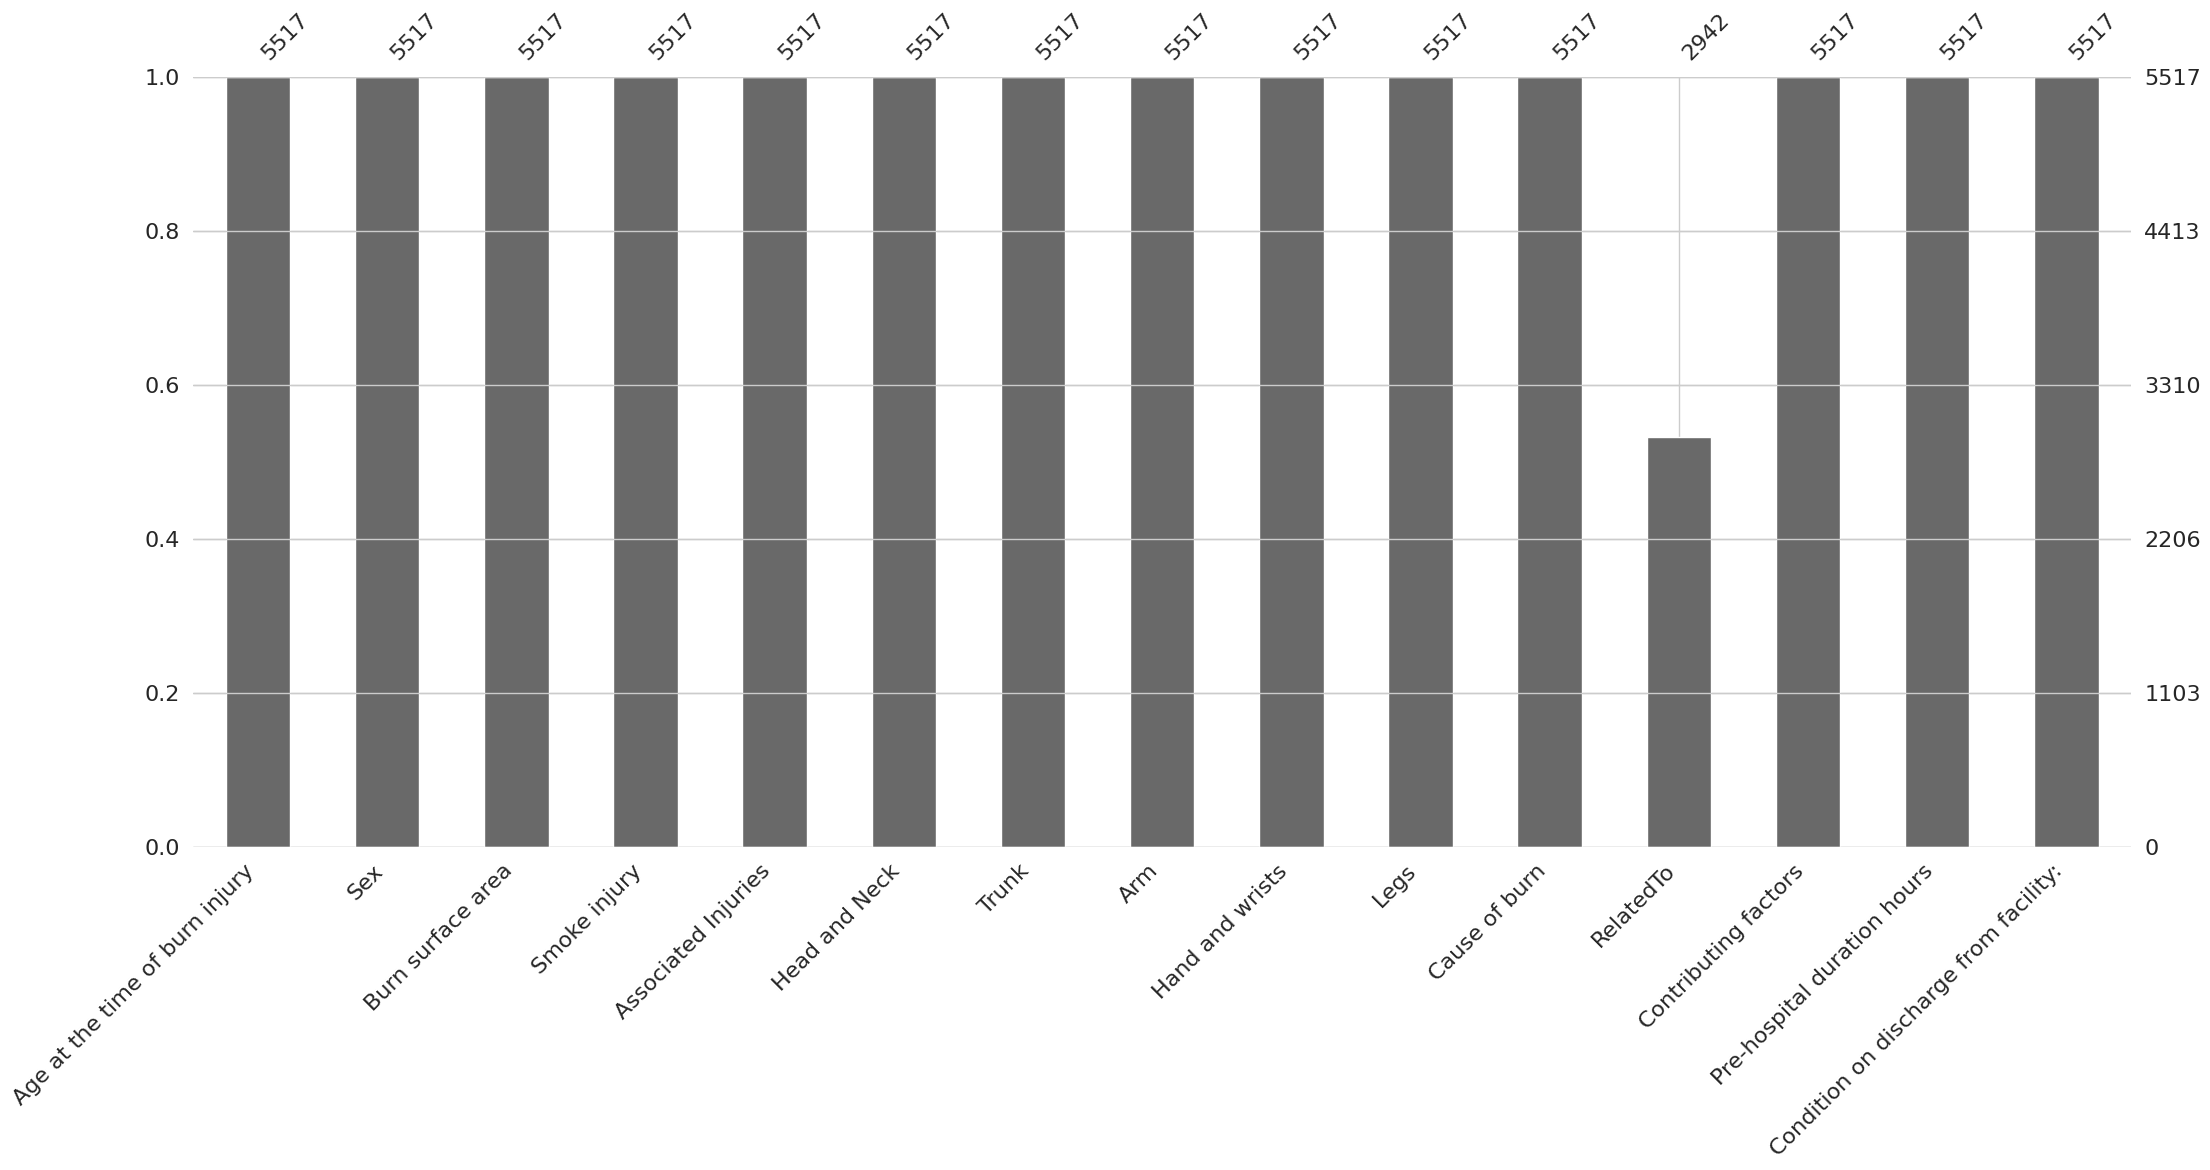

In [ ]:
msno.bar(final_df)

In [ ]:
import missingno as msno
msno.matrix(final_df)

NameError: name 'final_df' is not defined

<Axes: >

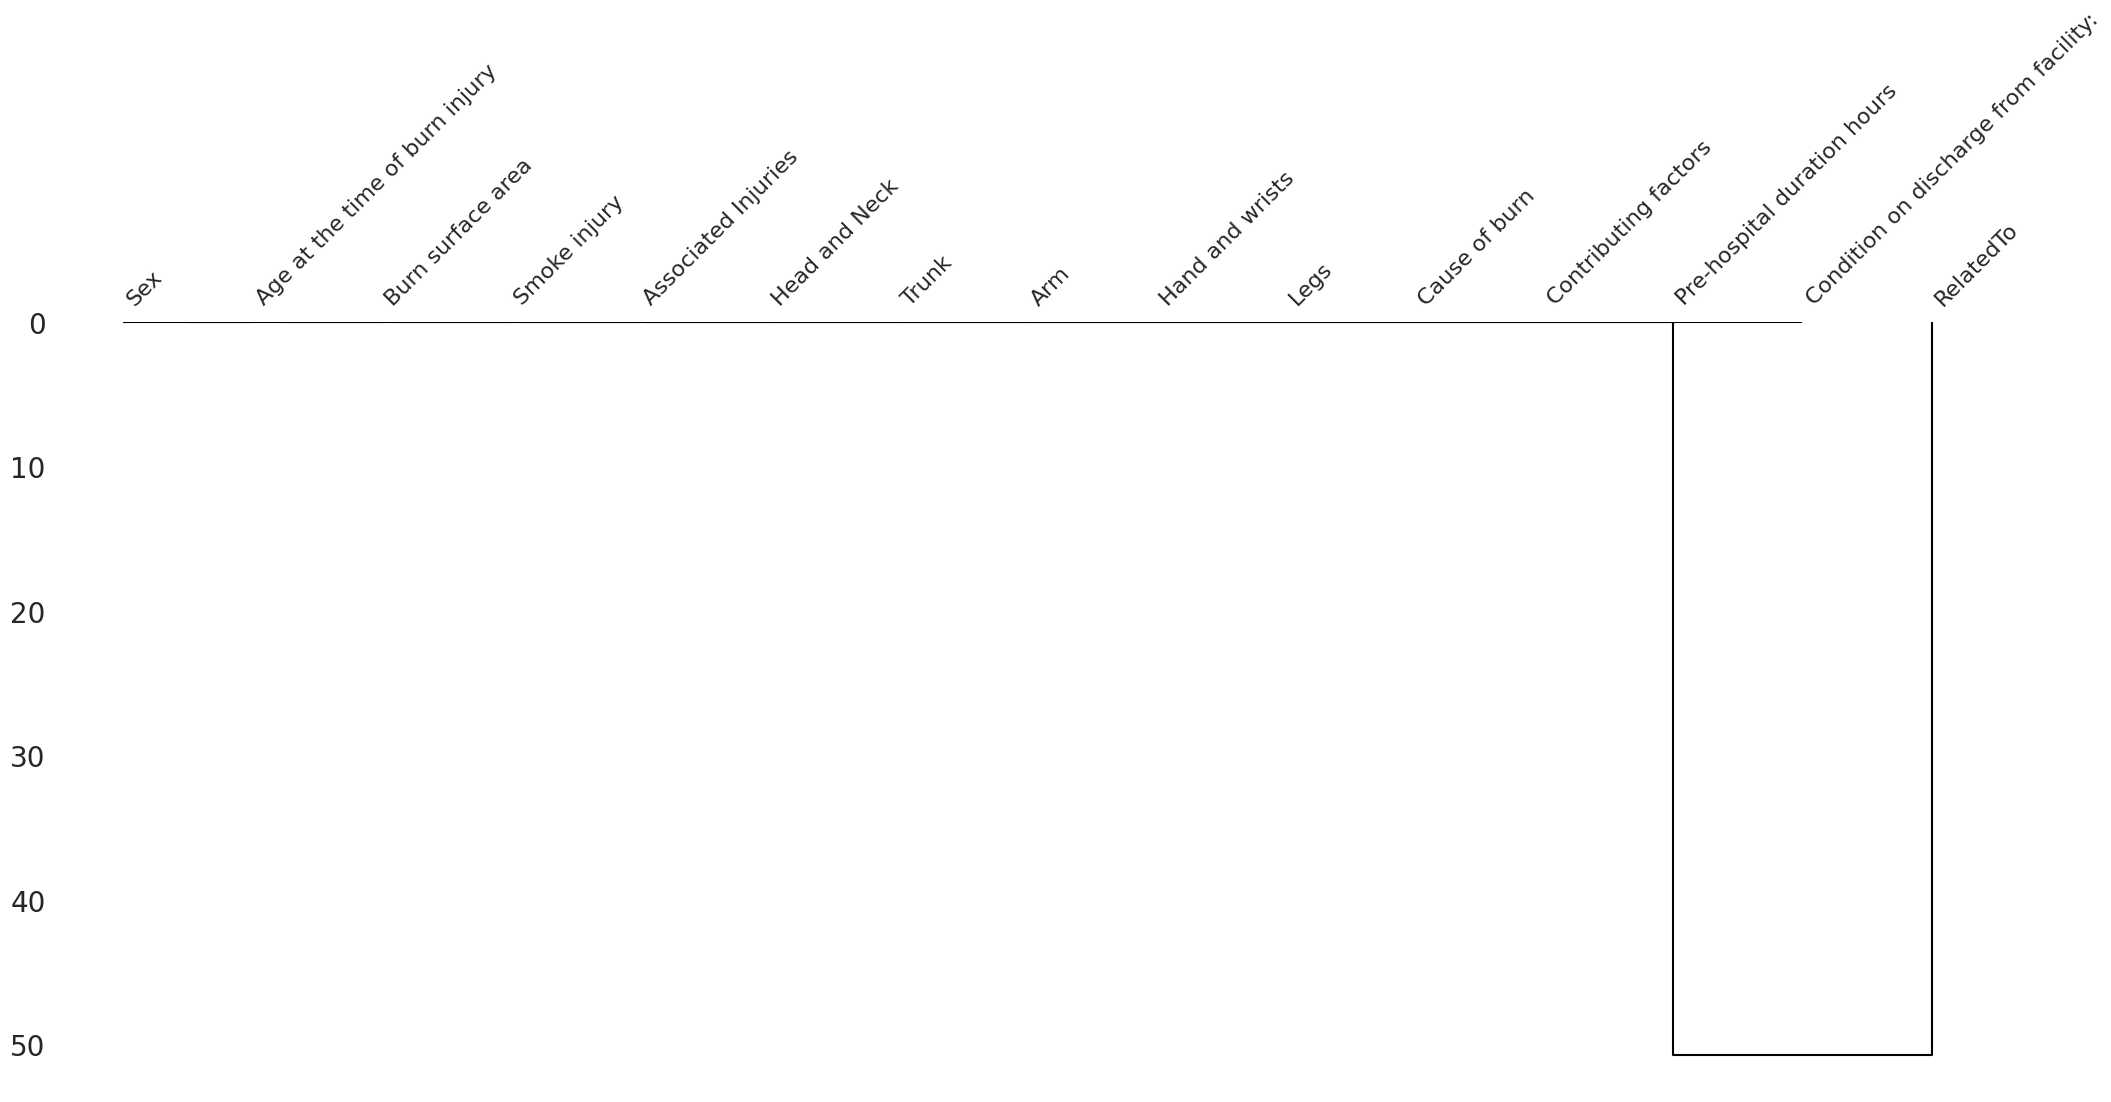

In [ ]:
msno.dendrogram(final_df)

In [ ]:
final_df['relatedto_missing'] = final_df['RelatedTo'].isnull().astype(int)
final_df.groupby('relatedto_missing')['Condition on discharge from facility:'].value_counts(normalize=True)


relatedto_missing  Condition on discharge from facility:      
0                  Discharged home without physical impairment    0.474847
                   Dead                                           0.296737
                   Discharged home with physical impairment       0.097893
                   Left against medical advice                    0.094494
                   Unknown                                        0.019714
                   Transferred to another facility                0.016315
1                  Discharged home without physical impairment    0.604660
                   Dead                                           0.208932
                   Discharged home with physical impairment       0.081553
                   Left against medical advice                    0.073786
                   Unknown                                        0.020583
                   Transferred to another facility                0.010485
Name: proportion, dtype: float64

🧠 What This Means:
Patients with known RelatedTo values have a significantly higher death rate than those with missing values.

This suggests that missingness is associated with better outcomes, not worse.

🧩 Therefore:
Missing values in RelatedTo are not informative of higher severity.

The pattern does not align with MNAR.

✅ Final Classification: MCAR (Missing Completely at Random)
Even though RelatedTo sounds like a social/contextual variable, in this dataset:

Its missingness appears random or uninformative with respect to patient mortality.

### Missing Data Imputation

In [ ]:
final_df['RelatedTo'] = final_df['RelatedTo'].fillna('Unknown')

### Target Column Cleaning

In [ ]:
final_df['Condition on discharge from facility:'].value_counts()

,count
Condition on discharge from facility:,
Discharged home without physical impairment,2954
Dead,1411
Discharged home with physical impairment,498
Left against medical advice,468
Unknown,111
Transferred to another facility,75


In [ ]:
# Drop rows where the target is 'Unknown'
final_df = final_df[final_df['Condition on discharge from facility:'] != 'Unknown'].copy()

In [ ]:
final_df['Condition on discharge from facility:'].value_counts()

,count
Condition on discharge from facility:,
Discharged home without physical impairment,2954
Dead,1411
Discharged home with physical impairment,498
Left against medical advice,468
Transferred to another facility,75


### Renaming Columns

In [ ]:
final_df.rename(columns={
    'Age at the time of burn injury': 'age',
    'Sex': 'sex',
    'Burn surface area': 'tbsa',
    'Smoke injury': 'inhalation_injury',
    'Associated Injuries': 'associated_injury',
    'Head and Neck': 'head_neck',
    'Trunk': 'trunk',
    'Arm': 'arm',
    'Hand and wrists': 'hand_wrists',
    'Legs': 'legs',
    'Cause of burn': 'burn_cause',
    'RelatedTo': 'related_to',
    'Contributing factors': 'contrib_factors',
    'Pre-hospital duration hours': 'prehosp_hours',
    'Condition on discharge from facility:': 'outcome'
}, inplace=True)


In [ ]:
final_df.columns

Index(['age', 'sex', 'tbsa', 'inhalation_injury', 'associated_injury',
       'head_neck', 'trunk', 'arm', 'hand_wrists', 'legs', 'burn_cause',
       'related_to', 'contrib_factors', 'prehosp_hours', 'outcome',
       'relatedto_missing'],
      dtype='object')

In [ ]:
final_df.drop(columns=['relatedto_missing'], inplace=True)

In [ ]:
final_df.columns

Index(['age', 'sex', 'tbsa', 'inhalation_injury', 'associated_injury',
       'head_neck', 'trunk', 'arm', 'hand_wrists', 'legs', 'burn_cause',
       'related_to', 'contrib_factors', 'surgery', 'hosp_days',
       'prehosp_hours', 'outcome'],
      dtype='object')

### Feature Categories Cleaning

In [ ]:
# Columns with composite (multi-category) string values
composite_columns = [
    'associated_injury',
    'head_neck',
    'trunk',
    'arm',
    'hand_wrists',
    'legs'
]

# Display unique value counts for each column
for col in composite_columns:
    print(f"\n Column: {col}")
    print("-" * 40)
    print(final_df[col].fillna("None").value_counts())



 Column: associated_injury
----------------------------------------
associated_injury
None                                                                                                     5265
Eye trauma                                                                                                 39
Long bone fracture                                                                                         28
Chest trauma                                                                                               17
Abdominal trauma                                                                                           15
Traumatic brain injury                                                                                     15
Long bone fracture;Traumatic brain injury                                                                   6
Spinal cord injury                                                                                          6
Eye trauma;Traumatic brain injury

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# List of columns to expand
multi_cols = ['associated_injury', 'head_neck', 'trunk', 'arm', 'hand_wrists', 'legs']

# Function to clean, split, and apply MultiLabelBinarizer
def expand_multilabel_columns(df, columns):
    for col in columns:
        # Step 1: Convert to list of labels (splitting on semicolon)
        split_data = df[col].fillna('None').apply(lambda x: [item.strip() for item in x.split(';')])

        # Step 2: Apply MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        binary_df = pd.DataFrame(mlb.fit_transform(split_data),
                                 columns=[f"{col}_{cls}" for cls in mlb.classes_],
                                 index=df.index)

        # Step 3: Concatenate with original df
        df = pd.concat([df, binary_df], axis=1)

    # Step 4: Drop original composite columns
    df.drop(columns=columns, inplace=True)

    return df

# Apply to your DataFrame
final_df = expand_multilabel_columns(final_df, multi_cols)

In [ ]:
final_df.columns

Index(['age', 'sex', 'tbsa', 'inhalation_injury', 'burn_cause', 'related_to',
       'contrib_factors', 'surgery', 'hosp_days', 'prehosp_hours', 'outcome',
       'associated_injury_Abdominal trauma', 'associated_injury_Chest trauma',
       'associated_injury_Eye trauma', 'associated_injury_Long bone fracture',
       'associated_injury_None', 'associated_injury_Spinal cord injury',
       'associated_injury_Traumatic brain injury', 'head_neck_Eye',
       'head_neck_Face', 'head_neck_Neck', 'head_neck_None', 'head_neck_Scalp',
       'trunk_Chest,abdomen,back or buttocks', 'trunk_None',
       'trunk_Perineum or genitals', 'arm_Elbow', 'arm_None',
       'arm_Shoulder and/or axilla', 'arm_Upper arm and/or forearm',
       'hand_wrists_Back of hand', 'hand_wrists_Fingers and/or thumb',
       'hand_wrists_None', 'hand_wrists_Palm', 'hand_wrists_Wrist',
       'legs_Ankle', 'legs_Foot', 'legs_Knee', 'legs_None',
       'legs_Thighs and/or lower leg'],
      dtype='object')

In [ ]:
for col in multi_cols:
    print(f"\nBinary columns created for: {col}")
    print([c for c in final_df.columns if c.startswith(f"{col}_")])


Binary columns created for: associated_injury
['associated_injury_Abdominal trauma', 'associated_injury_Chest trauma', 'associated_injury_Eye trauma', 'associated_injury_Long bone fracture', 'associated_injury_None', 'associated_injury_Spinal cord injury', 'associated_injury_Traumatic brain injury']

Binary columns created for: head_neck
['head_neck_Eye', 'head_neck_Face', 'head_neck_Neck', 'head_neck_None', 'head_neck_Scalp']

Binary columns created for: trunk
['trunk_Chest,abdomen,back or buttocks', 'trunk_None', 'trunk_Perineum or genitals']

Binary columns created for: arm
['arm_Elbow', 'arm_None', 'arm_Shoulder and/or axilla', 'arm_Upper arm and/or forearm']

Binary columns created for: hand_wrists
['hand_wrists_Back of hand', 'hand_wrists_Fingers and/or thumb', 'hand_wrists_None', 'hand_wrists_Palm', 'hand_wrists_Wrist']

Binary columns created for: legs
['legs_Ankle', 'legs_Foot', 'legs_Knee', 'legs_None', 'legs_Thighs and/or lower leg']


In [ ]:
# Convert outcome column to binary: 'Dead' or 'Survived'
# Any mention of 'Dead' stays as 'Dead', everything else becomes 'Survived'
final_df['outcome'] = final_df['outcome'].apply(lambda x: 'Dead' if 'Dead' in str(x) else 'Survived')


## EDA

### Compare Mortality Rate per Injury Type

<ipython-input-269-b734266b0f20>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




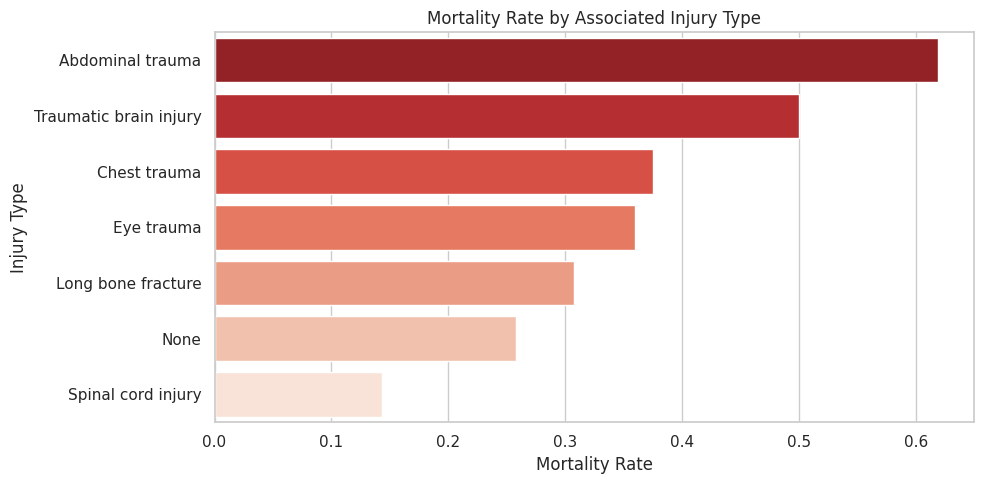

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('associated_injury_')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('associated_injury_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Associated Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


| Injury Type                | Mortality Rate | Interpretation                                                                                                                              |
| -------------------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Abdominal trauma**       | \~0.62         | Extremely high risk. Patients with this injury type are the most vulnerable. This may require urgent intervention or triage prioritization. |
| **Traumatic brain injury** | \~0.50         | Very high risk. Neurological injuries significantly affect survival likelihood.                                                             |
| **Chest trauma**           | \~0.38         | Respiratory/thoracic damage is also a strong predictor of death.                                                                            |
| **Eye trauma**             | \~0.36         | Surprisingly high — may indicate injury severity or strong co-occurrence with other trauma.                                                 |
| **Long bone fracture**     | \~0.31         | Less fatal alone but often appears in conjunction with other injuries.                                                                      |
| **None**                   | \~0.26         | This is your “baseline” mortality — patients with no associated injuries still had a 26% mortality rate.                                    |
| **Spinal cord injury**     | \~0.14         | Much lower than expected — might reflect milder burns or better care outcomes.                                                              |


**Inference:**

These results validate that not all injuries are equally lethal.

Your model could weigh these injury types as predictive features — especially abdominal trauma and TBI.

The fact that "None" still has a 26% mortality rate shows that burn severity alone can be fatal, even without additional trauma.

<ipython-input-270-b933f982bed4>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




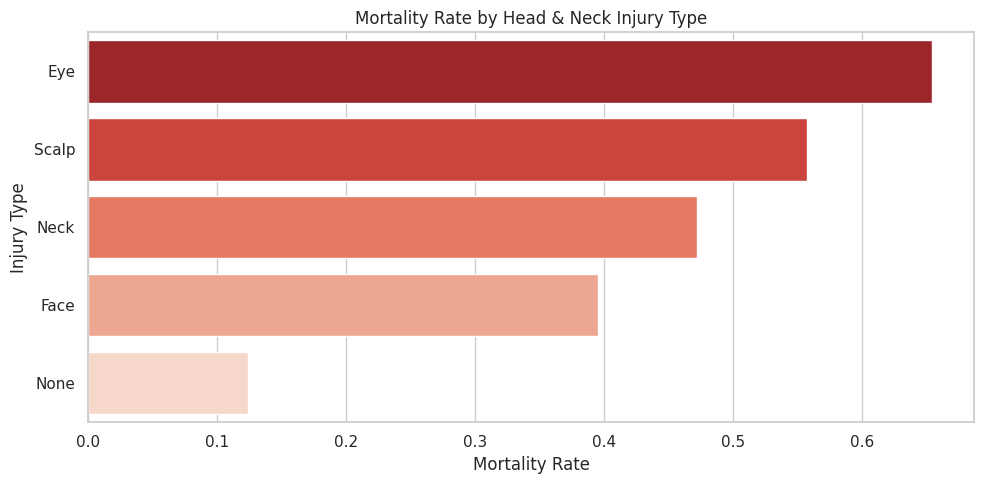

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('head_neck_')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('head_neck_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Head & Neck Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


<ipython-input-271-69d7254761e0>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




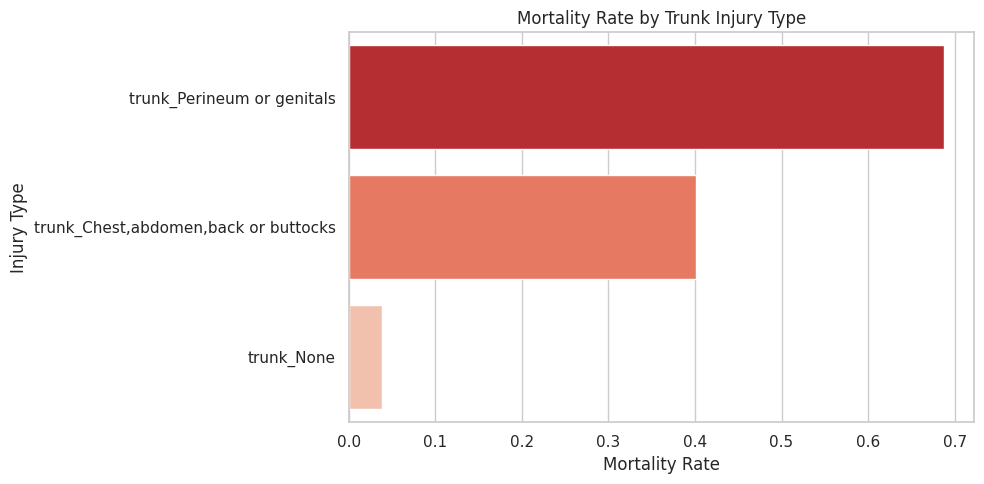

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('trunk_')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('head_neck_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Trunk Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


<ipython-input-272-323ceb3f0970>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




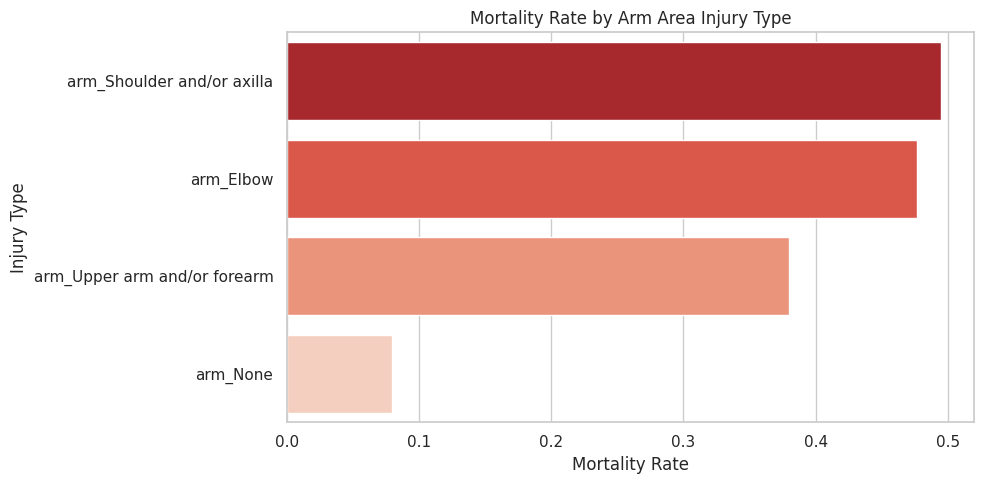

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('arm_')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('head_neck_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Arm Area Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


<ipython-input-273-4974264c5d40>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




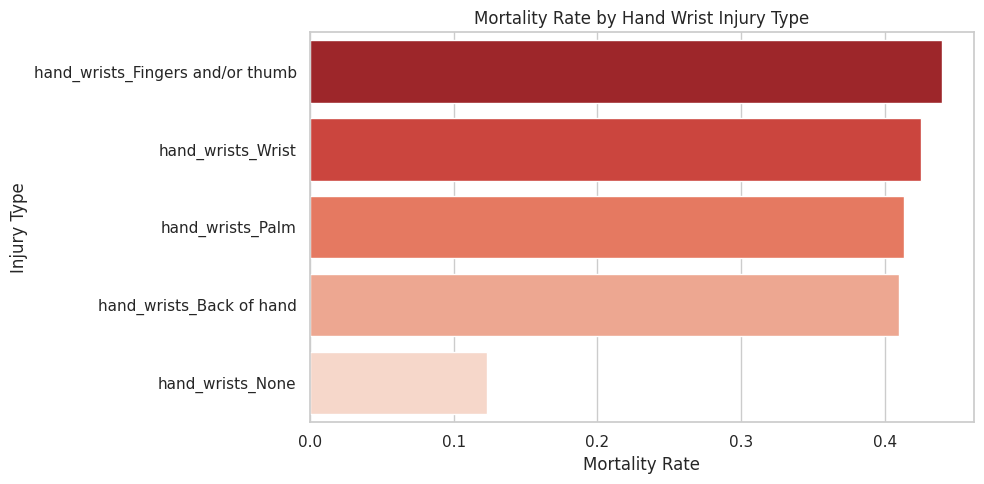

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('hand_wrists_')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('head_neck_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Hand Wrist Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


<ipython-input-274-bcab5cc15c67>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




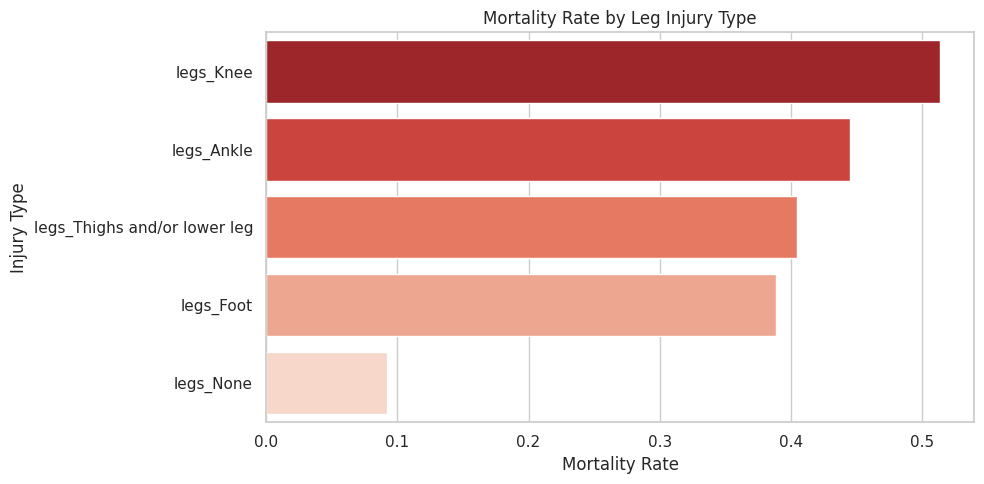

In [ ]:
#To calculate mortality rate (i.e., % of patients who died) for each injury type
# Only select binary columns from associated_injury
injury_cols = [col for col in final_df.columns if col.startswith('leg')]

# Mortality flag: 1 if dead, 0 otherwise
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)

# Calculate mortality rate for each injury
mortality_stats = []

for col in injury_cols:
    total = final_df[col].sum()
    dead = final_df[final_df[col] == 1]['is_dead'].sum()
    rate = dead / total if total != 0 else 0
    mortality_stats.append((col.replace('head_neck_', ''), total, dead, round(rate, 3)))

mortality_df = pd.DataFrame(mortality_stats, columns=['Injury', 'Patients', 'Deaths', 'Mortality Rate'])


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Mortality Rate', y='Injury', data=mortality_df.sort_values('Mortality Rate', ascending=False), palette='Reds_r')
plt.title('Mortality Rate by Leg Injury Type')
plt.xlabel('Mortality Rate')
plt.ylabel('Injury Type')
plt.tight_layout()
plt.show()


| Injury Area           | Subtype                     | Mortality Rate | Key Observation                                 |
| --------------------- | --------------------------- | -------------- | ----------------------------------------------- |
| **Associated Injury** | Abdominal trauma            | **0.62**       | Highest mortality in this category              |
|                       | Traumatic brain injury      | 0.50           | Also very lethal                                |
|                       | Spinal cord injury          | 0.14           | Surprisingly lower mortality                    |
|                       | None                        | 0.26           | Baseline without injury                         |
| **Head & Neck**       | Eye                         | **0.66**       | Eye injury has highest mortality                |
|                       | Scalp                       | 0.56           | Followed by scalp injuries                      |
|                       | None                        | 0.13           | Lowest risk                                     |
| **Trunk**             | Perineum or genitals        | **0.68**       | Highest mortality overall across all body parts |
|                       | Chest/Abdomen/Back/Buttocks | 0.40           | Still significantly high                        |
|                       | None                        | 0.04           | Very low mortality when trunk not affected      |
| **Arm**               | Shoulder and/or axilla      | **0.49**       | Highest arm-related mortality                   |
|                       | Elbow                       | 0.47           | Close to shoulder                               |
|                       | None                        | 0.08           | Safest in this area                             |
| **Hand & Wrists**     | Fingers and/or thumb        | **0.44**       | Most lethal area in hand injuries               |
|                       | Wrist                       | 0.43           | Slightly lower                                  |
|                       | None                        | 0.12           | Least fatal                                     |
| **Legs**              | Knee                        | **0.51**       | Most lethal part of the leg                     |
|                       | Ankle                       | 0.45           | Next highest risk                               |
|                       | None                        | 0.09           | Safest zone in leg injuries                     |


**Summary:**

1. Perineum or genitals (trunk) injuries have the highest mortality (0.68) overall.

2. Eye injuries (head_neck) and abdominal trauma (associated_injury) also show high risk.

3. Injury to none of the areas (i.e., None columns) consistently shows low mortality, acting as a strong contrast group.

### Mortality by Burn Severity

**TBSA(Total Body Surface Area) vs. Mortality**

<ipython-input-275-39d5badbb472>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




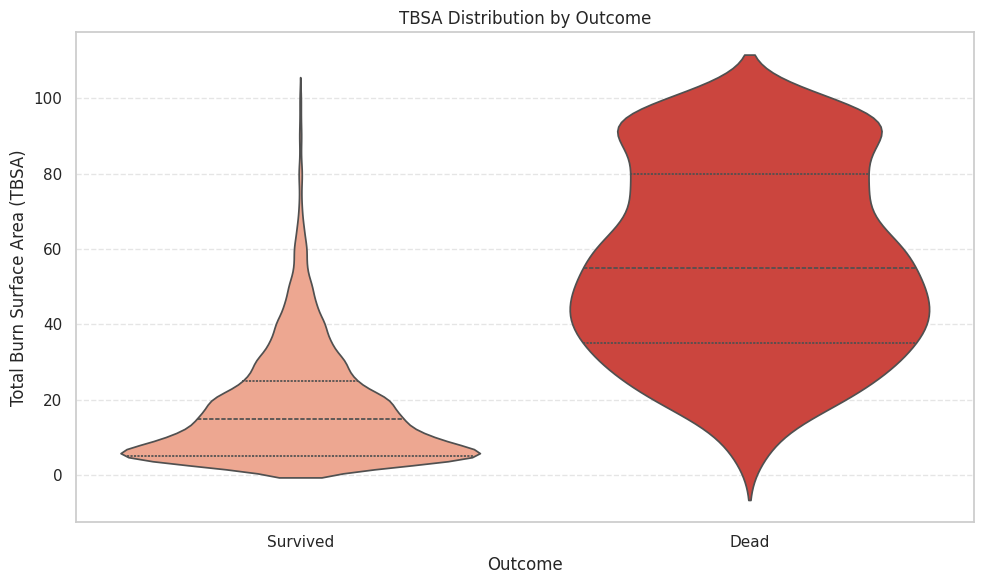

In [ ]:
# Convert outcome to binary for better grouping
final_df['is_dead'] = final_df['outcome'].str.lower().str.contains('dead').astype(int)
final_df['outcome_group'] = final_df['is_dead'].map({1: 'Dead', 0: 'Survived'})

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_df, x='outcome_group', y='tbsa', palette='Reds', inner='quartile')
plt.title('TBSA Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Total Burn Surface Area (TBSA)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Key Observations:**
1. Higher TBSA → Higher Mortality: The TBSA values for patients who died are centered around 40–60%, with many above 80%. The distribution is wide and flat, suggesting death occurs across a broad range, especially as TBSA increases.

2. Survivors Have Lower TBSA: Survivors mostly fall below 30% TBSA. The plot is narrower and peaked at low TBSA values (~5–10%), indicating most survivors had relatively minor burns.

3. Clear Visual Separation: There's a visible distinction in TBSA between the “Survived” and “Dead” groups — a good indicator that TBSA is a strong predictor of mortality.

**Conclusion:**

This confirms the clinical expectation — as burn severity increases (higher TBSA), the risk of death rises. It also justifies using TBSA in any risk prediction model or score like the Baux Score.

**Age group VS mortality**

<ipython-input-276-93d62b0bd908>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

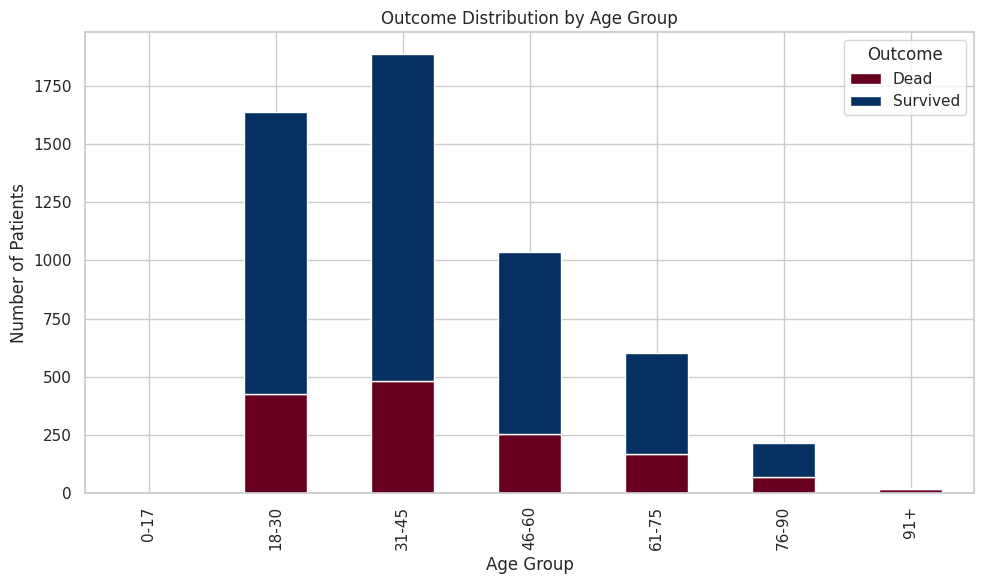

In [ ]:
# Create age bins
age_bins = [0, 18, 30, 45, 60, 75, 90, 120]
age_labels = ['0-17', '18-30', '31-45', '46-60', '61-75', '76-90', '91+']
final_df['age_group'] = pd.cut(final_df['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and outcome
age_outcome_counts = final_df.groupby(['age_group', 'outcome']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
age_outcome_counts.plot(kind='bar', stacked=True, colormap='RdBu', figsize=(10, 6))

plt.title('Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


| Age Group         | Key Insight                                                                                                      |
| ----------------- | ---------------------------------------------------------------------------------------------------------------- |
| **18–30 & 31–45** | Highest number of patients overall, but most survived. However, a **visible number of deaths** also occurred.    |
| **46–60**         | Fewer patients than younger groups, but **death rate increases noticeably**.                                     |
| **61–75**         | Death count remains considerable despite smaller group size — indicating **higher mortality risk with age**.     |
| **76–90**         | Sharp drop in total patients, yet **death count remains significant**, suggesting **poor prognosis in elderly**. |
| **91+**           | Very few patients, but still at least one death — confirms **extreme vulnerability at oldest ages**.             |


**Final Takeaway:**

While most burn patients are younger adults (18–45), mortality risk rises steeply after age 45.

Age is a strong predictor of mortality — valuable for risk stratification in models or care prioritization.

**Age vs. Mortality**

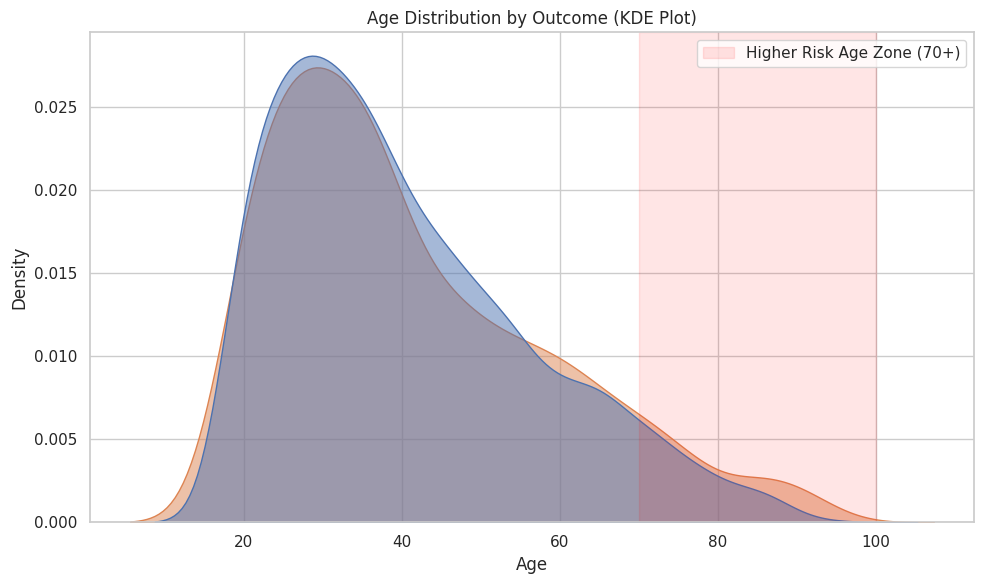

In [ ]:
# Create KDE plot for age distribution by outcome
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_df, x='age', hue='outcome', common_norm=False, fill=True, alpha=0.5)
plt.axvspan(70, 100, color='red', alpha=0.1, label='Higher Risk Age Zone (70+)')
plt.title('Age Distribution by Outcome (KDE Plot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Orange = Dead

Blue = Survived

**Observation: Age Distribution by Outcome (KDE Plot)**

1. Overlap in Density: The density curves for Survived and Dead largely overlap across most of the age range, especially from ages 20 to 60. This suggests that age alone is not a decisive predictor in these middle ranges.

2. Higher Density of Deaths After Age 70: The curve for Dead cases shows a notable rightward tail (especially in the 70+ range). This aligns with the shaded High-Risk Age Zone (70+), confirming that older patients are more likely to die from burn injuries.

3. Young Adults (20–40): Both groups peak here, but survivors dominate—this is the healthiest survival zone.

**Conclusion:**

Mortality risk sharply increases in the elderly (70+), while younger adults tend to survive at higher rates.
This confirms the need for special attention to geriatric(older patients) burn care.

**Sex VS Mortality**

In [ ]:
# Make sure 'final_df' contains 'sex' and 'outcome' columns
sex_mortality_df = final_df.copy()
sex_mortality_df['is_dead'] = (sex_mortality_df['outcome'] == 'Dead').astype(int)

# Count outcomes per sex
sex_counts = sex_mortality_df.groupby(['sex', 'outcome']).size().reset_index(name='count')

# Plot
fig = px.bar(
    sex_counts,
    x='sex',
    y='count',
    color='outcome',
    color_discrete_sequence=['skyblue', 'lightcoral'],
    barmode='stack',
    text='count',
    title='Outcome Distribution by Sex (Interactive)',
    labels={'sex': 'Sex', 'count': 'Number of Patients', 'outcome': 'Outcome'}
)

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


**Observations:**

**Female Patients:**

Total: 2,204

Dead: 732

Mortality rate ≈ 33.2%

**Male Patients:**

Total: 3,202

Dead: 679

Mortality rate ≈ 21.2%

**Insight:**Female patients in this dataset appear to have a higher mortality rate than male patients, even though males had more burn incidents.

**Inhalation_Injury VS Mortality**

In [ ]:
# Group and count
inhale_outcome = final_df.groupby(['inhalation_injury', 'outcome']).size().reset_index(name='count')

# Plotly bar chart
fig = px.bar(
    inhale_outcome,
    x='inhalation_injury',
    y='count',
    color='outcome',
    color_discrete_sequence=['lightpink','purple'],
    text='count',
    barmode='stack',
    title='Outcome Distribution by Inhalation Injury (Interactive)',
    labels={'inhalation_injury': 'Inhalation Injury', 'count': 'Number of Patients'}
)

fig.update_layout(
    xaxis_title='Inhalation Injury',
    yaxis_title='Number of Patients',
    legend_title='Outcome',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()

**Interpretation of the Plot:**

**Without Inhalation Injury (No):**

Survived: 3,625

Dead: 672

Mortality Rate ≈ 15.6%

**With Inhalation Injury (Yes):**

Survived: 370

Dead: 739

Mortality Rate ≈ 66.6% ❗️

This shows a dramatic increase in death rate when inhalation injury is present — even though fewer total patients had it, more than half died.

**Outcome Distribution by Cause of Burn**

In [ ]:
# Group outcome counts by cause of burn
cause_outcome_counts = final_df.groupby(['burn_cause', 'outcome']).size().reset_index(name='count')

# Compute mortality rate
pivot_table = cause_outcome_counts.pivot(index='burn_cause', columns='outcome', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Mortality Rate (%)'] = round((pivot_table.get('Dead', 0) / pivot_table['Total']) * 100, 1)
pivot_table = pivot_table.sort_values('Mortality Rate (%)', ascending=False).reset_index()

# Save if needed
pivot_table.to_csv('mortality_by_burn_cause.csv', index=False)

# Interactive bar plot
fig = px.bar(cause_outcome_counts,
             x='burn_cause',
             y='count',
             color='outcome',
             barmode='group',
             text='count',
             title='Outcome Distribution by Cause of Burn',
             labels={'burn_cause': 'Cause of Burn', 'count': 'Number of Patients', 'outcome': 'Outcome'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

| **Cause of Burn**            | **Dead** | **Survived** | **Mortality Rate (%)** |
| ---------------------------- | -------- | ------------ | ---------------------- |
| **Flame**                    | 1,252    | 2,237        | **\~35.9%**            |
| **Electrical**               | 77       | 531          | \~12.7%                |
| **Hot liquid, steam or gas** | 34       | 797          | \~4.1%                 |
| **Hot surface**              | 25       | 232          | \~9.7%                 |
| **Chemical**                 | 7        | 128          | \~5.2%                 |
| **Friction**                 | 1        | 14           | \~6.7%                 |
| **Other**                    | 14       | 38           | \~26.9%                |
| **Inhalation**               | 1        | 3            | \~25.0%                |
| **Radiation**                | 0        | 10           | 0.0%                   |
| **Cooling**                  | 0        | 5            | 0.0%                   |


✅ The Flame category dominates both in number and in absolute mortality count. It also has the highest mortality rate among common causes.

⚠️ Electrical burns have a surprisingly high mortality rate (~12.7%), considering their lower case count.

🧯 Hot liquids and steam are frequent but have low mortality (~4%).

**📌 Interpretation:**

Flame burns are the most critical in both frequency and fatality.

Electrical and Other/Uncommon causes show higher relative risk than commonly assumed.

Inhalation, though rare as a primary cause, shows serious outcomes.

Cooling and Radiation cases may not be life-threatening based on this dataset.

### Correlation/HeatMap

<ipython-input-282-45870ba3462e>:11: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



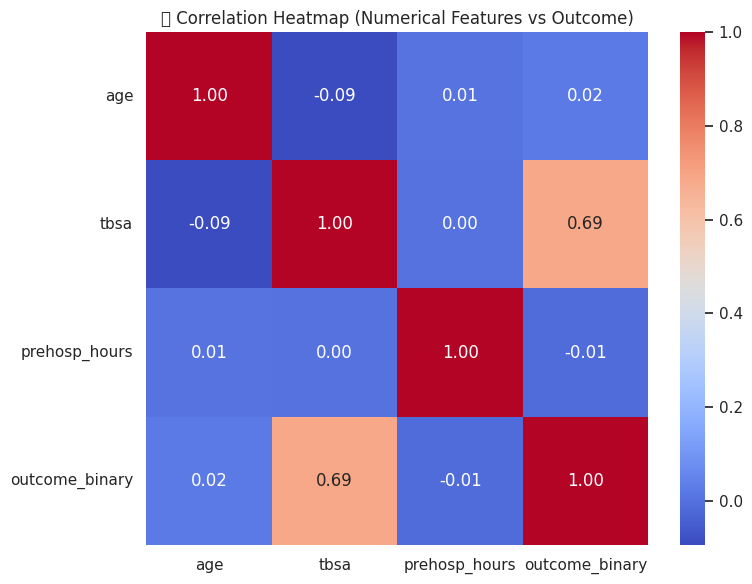

In [ ]:
# Binary target column (if not already)
final_df['outcome_binary'] = final_df['outcome'].apply(lambda x: 1 if x == 'Dead' else 0)

# Numerical features for correlation
numerical_features = ['age', 'tbsa', 'prehosp_hours', 'outcome_binary']

# Compute and plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Heatmap (Numerical Features vs Outcome)")
plt.tight_layout()
plt.show()

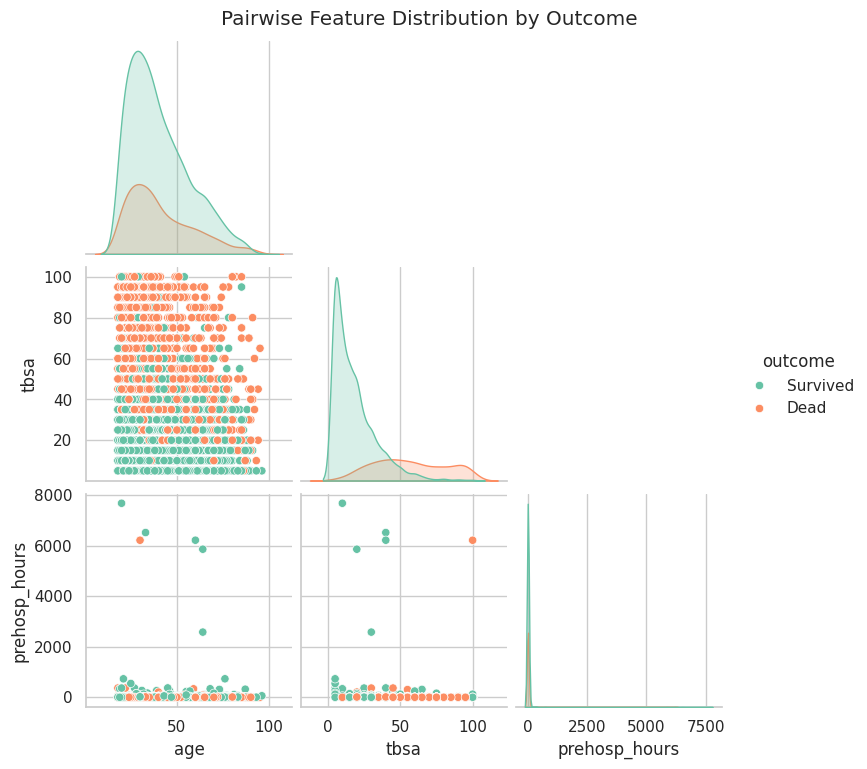

In [ ]:
# Optional: Shorten column names for display
pairplot_df = final_df[['age', 'tbsa', 'prehosp_hours', 'outcome']]

# Plot pairplot with hue as outcome
sns.pairplot(pairplot_df, hue='outcome', corner=True, palette='Set2')
plt.suptitle("Pairwise Feature Distribution by Outcome", y=1.02)
plt.show()

In [ ]:
final_df=final_df.drop(columns=['is_dead', 'outcome_group', 'age_group',
       'outcome_binary'], axis=1)

In [ ]:
final_df.columns

Index(['age', 'sex', 'tbsa', 'inhalation_injury', 'burn_cause', 'related_to',
       'contrib_factors', 'surgery', 'hosp_days', 'prehosp_hours', 'outcome',
       'associated_injury_Abdominal trauma', 'associated_injury_Chest trauma',
       'associated_injury_Eye trauma', 'associated_injury_Long bone fracture',
       'associated_injury_None', 'associated_injury_Spinal cord injury',
       'associated_injury_Traumatic brain injury', 'head_neck_Eye',
       'head_neck_Face', 'head_neck_Neck', 'head_neck_None', 'head_neck_Scalp',
       'trunk_Chest,abdomen,back or buttocks', 'trunk_None',
       'trunk_Perineum or genitals', 'arm_Elbow', 'arm_None',
       'arm_Shoulder and/or axilla', 'arm_Upper arm and/or forearm',
       'hand_wrists_Back of hand', 'hand_wrists_Fingers and/or thumb',
       'hand_wrists_None', 'hand_wrists_Palm', 'hand_wrists_Wrist',
       'legs_Ankle', 'legs_Foot', 'legs_Knee', 'legs_None',
       'legs_Thighs and/or lower leg'],
      dtype='object')

## Handling Outliers

In [ ]:
num_features = ['age', 'tbsa', 'prehosp_hours']

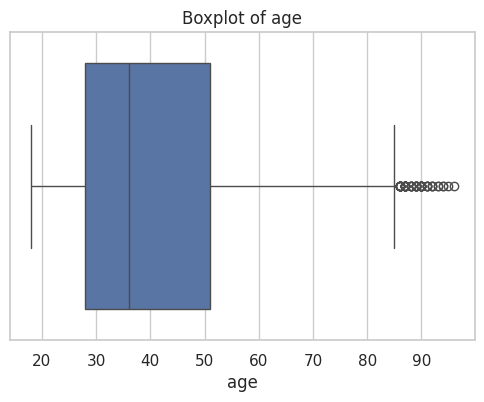

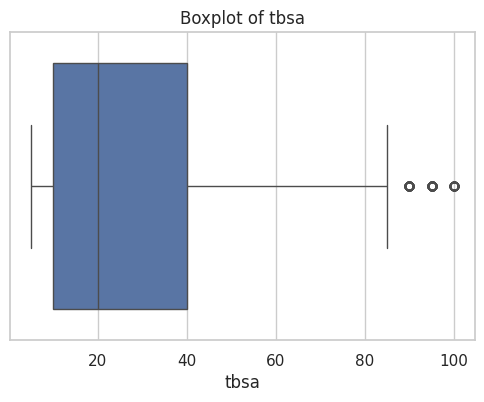

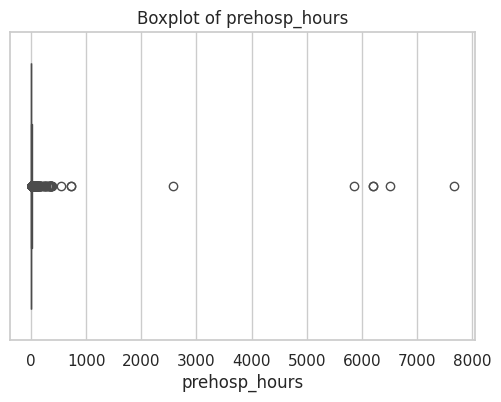

In [ ]:
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

plot_boxplots(final_df, num_features)

| Feature         | Action                                                                             |
| --------------- | ---------------------------------------------------------------------------------- |
| `age`           | Keep all. Elderly patients are important for mortality analysis.                   |
| `tbsa`          | Keep all. High TBSA indicates severe burns; valuable signal.                       |
| `prehosp_hours` | Consider capping at 168 hours (7 days) if outliers dominate. |


In [ ]:
for col in num_features:
  print(f"Column: {col}")
  print(final_df[col].describe())

Column: age
count    5406.000000
mean       40.530337
std        16.594977
min        18.000000
25%        28.000000
50%        36.000000
75%        51.000000
max        96.000000
Name: age, dtype: float64
Column: tbsa
count    5406.000000
mean       28.029042
std        24.574358
min         5.000000
25%        10.000000
50%        20.000000
75%        40.000000
max       100.000000
Name: tbsa, dtype: float64
Column: prehosp_hours
count    5406.000000
mean       12.151683
std       202.883698
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max      7671.000000
Name: prehosp_hours, dtype: float64


In [ ]:
# # Plot distributions of hosp_days and prehosp_hours
# fig= plt.subplots(1, 2, figsize=(14, 5))

# # Distribution of prehosp_hours
# sns.histplot(final_df['prehosp_hours'], bins=100, kde=True, ax=axes[1], color='salmon')
# axes[1].set_title('Distribution of Pre-hospital Duration (prehosp_hours)')
# axes[1].set_xlabel('prehosp_hours')

# plt.tight_layout()
# plt.show()

<Figure size 640x480 with 0 Axes>

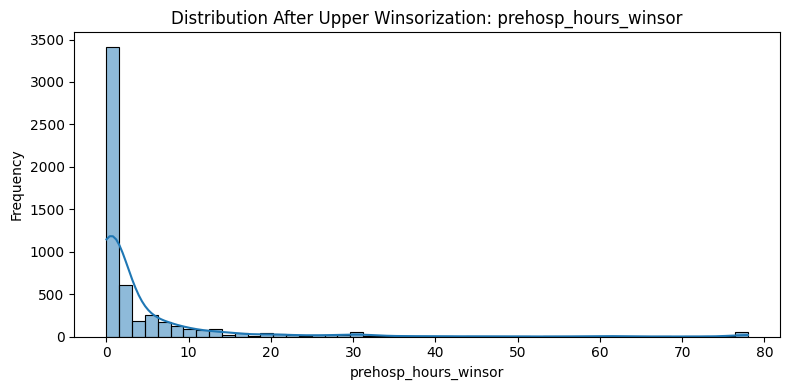

In [ ]:
from scipy.stats.mstats import winsorize

# Function to Winsorize only upper end (e.g., top 1%)
def winsorize_upper_only(df, column, upper_limit=0.01):
    winsorized = winsorize(df[column], limits=(0.0, upper_limit))
    df[f'{column}_winsor'] = winsorized
    return df

# Apply to both columns
final_df = winsorize_upper_only(final_df, 'prehosp_hours')

# Optional: Visualize the post-Winsorization distributions
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['prehosp_hours_winsor']:
    plt.figure(figsize=(8, 4))
    sns.histplot(final_df[col], bins=50, kde=True)
    plt.title(f'Distribution After Upper Winsorization: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


**Interpretation of the Winsorized Distributions:**

**prehosp_hours_winsor:**

Originally had values over 7000 hours (~300 days) before hospital admission.

Now capped around 80 hours, which makes sense in emergency burn cases.

The plot shows a steep drop, with the majority of cases admitted within 0–10 hours—expected in acute care settings.

In [ ]:
# List of original categorical columns
cat_cols = ['sex', 'inhalation_injury', 'burn_cause', 'related_to', 'contrib_factors']

# Threshold: 1% of total rows
threshold = 0.01 * len(final_df)

# Show rare categories for each column
for col in cat_cols:
    print(f"\nColumn: {col}")
    value_counts = final_df[col].value_counts(dropna=False)
    rare = value_counts[value_counts < threshold]
    if rare.empty:
        print("✅ No rare categories.")
    else:
        print("⚠️ Rare categories (merge or group as 'Other'):")
        print(rare)



Column: sex
✅ No rare categories.

Column: inhalation_injury
✅ No rare categories.

Column: burn_cause
⚠️ Rare categories (merge or group as 'Other'):
burn_cause
Other         52
Friction      15
Radiation     10
Cooling        5
Inhalation     4
Name: count, dtype: int64

Column: related_to
⚠️ Rare categories (merge or group as 'Other'):
related_to
Road traffic crash       54
Assault                  31
Bonfires                 29
Playing with fire        29
Household appliance      23
House fire (multiple)    19
Fireworks                17
Spilled liquids           8
Lightning                 5
Name: count, dtype: int64

Column: contrib_factors
⚠️ Rare categories (merge or group as 'Other'):
contrib_factors
Dementia    8
Name: count, dtype: int64


In [ ]:
# Define thresholds and replacement mappings
burn_cause_rare = ['Other', 'Friction', 'Radiation', 'Cooling', 'Inhalation']
related_to_rare = [
    'Road traffic crash', 'Assault', 'Bonfires', 'Playing with fire',
    'Household appliance', 'House fire (multiple)', 'Fireworks',
    'Spilled liquids', 'Lightning'
]
contrib_factors_rare = ['Dementia']

# Apply replacement
final_df['burn_cause'] = final_df['burn_cause'].apply(lambda x: 'Other' if x in burn_cause_rare else x)
final_df['related_to'] = final_df['related_to'].apply(lambda x: 'Other' if x in related_to_rare else x)
final_df['contrib_factors'] = final_df['contrib_factors'].apply(lambda x: 'Other' if x in contrib_factors_rare else x)

In [ ]:
# List of original categorical columns
cat_cols = ['sex', 'inhalation_injury', 'burn_cause', 'related_to', 'contrib_factors']

# Threshold: 1% of total rows
threshold = 0.01 * len(final_df)

# Show rare categories for each column
for col in cat_cols:
    print(f"\nColumn: {col}")
    value_counts = final_df[col].value_counts(dropna=False)
    rare = value_counts[value_counts < threshold]
    if rare.empty:
        print("✅ No rare categories.")
    else:
        print("⚠️ Rare categories (merge or group as 'Other'):")
        print(rare)



Column: sex
✅ No rare categories.

Column: inhalation_injury
✅ No rare categories.

Column: burn_cause
✅ No rare categories.

Column: related_to
✅ No rare categories.

Column: contrib_factors
✅ No rare categories.


## Feature Engineering

In [ ]:
age_bins = [18, 30, 45, 60, 75, 100]
age_labels = ['18–30', '31–45', '46–60', '61–75', '76+']

# Create new column
final_df['age_group'] = pd.cut(final_df['age'], bins=age_bins, labels=age_labels, right=True)

# Check result
print(final_df[['age', 'age_group']].head())

    age age_group
0  25.0     18–30
1  36.0     31–45
2  21.0     18–30
3  41.0     31–45
4  30.0     18–30


In [ ]:
# Select all binary injury columns (those that came from multilabel binarization)
injury_cols = [col for col in final_df.columns if col.startswith((
    'associated_injury_', 'head_neck_', 'trunk_', 'arm_', 'hand_wrists_', 'legs_'
))]

# Create injury burden score
final_df['injury_burden_score'] = final_df[injury_cols].sum(axis=1)

# Quick check: show distribution
final_df['injury_burden_score'].value_counts().sort_index()


,count
injury_burden_score,
6,1320
7,840
8,650
9,573
10,376
11,358
12,331
13,223
14,217


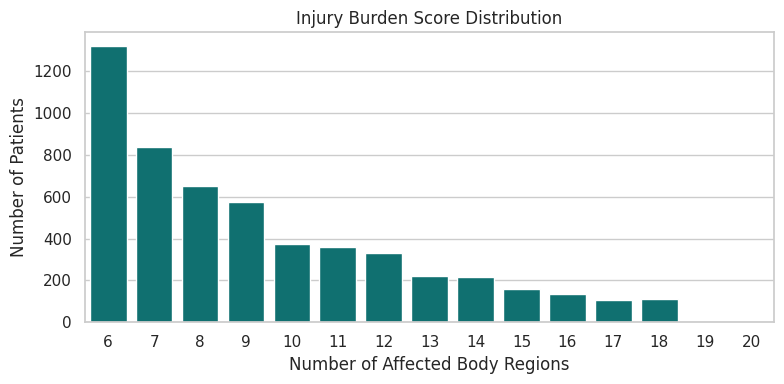

In [ ]:
# Visualize distribution of injury burden score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(data=final_df, x='injury_burden_score', color='teal')
plt.title('Injury Burden Score Distribution')
plt.xlabel('Number of Affected Body Regions')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

## Encoding Features

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5406 entries, 0 to 9276
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       5406 non-null   float64
 1   sex                                       5406 non-null   object 
 2   tbsa                                      5406 non-null   float64
 3   inhalation_injury                         5406 non-null   object 
 4   burn_cause                                5406 non-null   object 
 5   related_to                                2884 non-null   object 
 6   contrib_factors                           5406 non-null   object 
 7   surgery                                   5406 non-null   object 
 8   hosp_days                                 5406 non-null   float64
 9   prehosp_hours                             5406 non-null   float64
 10  outcome                                  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
binary_cols = ['sex', 'inhalation_injury']
le = LabelEncoder()
for col in binary_cols:
    final_df[col] = le.fit_transform(final_df[col])


In [ ]:
# Columns to encode
one_hot_cols = ['burn_cause', 'related_to', 'contrib_factors', 'age_group']

# One-Hot Encoding (drop_first=True to avoid multicollinearity)
final_df = pd.get_dummies(final_df, columns=one_hot_cols, drop_first=True)

In [ ]:
final_df.columns

Index(['age', 'sex', 'tbsa', 'inhalation_injury', 'surgery', 'hosp_days',
       'prehosp_hours', 'outcome', 'associated_injury_Abdominal trauma',
       'associated_injury_Chest trauma', 'associated_injury_Eye trauma',
       'associated_injury_Long bone fracture', 'associated_injury_None',
       'associated_injury_Spinal cord injury',
       'associated_injury_Traumatic brain injury', 'head_neck_Eye',
       'head_neck_Face', 'head_neck_Neck', 'head_neck_None', 'head_neck_Scalp',
       'trunk_Chest,abdomen,back or buttocks', 'trunk_None',
       'trunk_Perineum or genitals', 'arm_Elbow', 'arm_None',
       'arm_Shoulder and/or axilla', 'arm_Upper arm and/or forearm',
       'hand_wrists_Back of hand', 'hand_wrists_Fingers and/or thumb',
       'hand_wrists_None', 'hand_wrists_Palm', 'hand_wrists_Wrist',
       'legs_Ankle', 'legs_Foot', 'legs_Knee', 'legs_None',
       'legs_Thighs and/or lower leg', 'hosp_days_winsor',
       'prehosp_hours_winsor', 'injury_burden_score', 'burn_ca

In [ ]:
# Convert all boolean columns to integers
bool_cols = final_df.select_dtypes(include='bool').columns
final_df[bool_cols] = final_df[bool_cols].astype(int)

In [ ]:
final_df['outcome'] = final_df['outcome'].map({'Survived': 0, 'Dead': 1})

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5406 entries, 0 to 9276
Data columns (total 63 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            5406 non-null   float64
 1   sex                                            5406 non-null   int64  
 2   tbsa                                           5406 non-null   float64
 3   inhalation_injury                              5406 non-null   int64  
 4   prehosp_hours                                  5406 non-null   float64
 5   outcome                                        5406 non-null   int64  
 6   associated_injury_Abdominal trauma             5406 non-null   int64  
 7   associated_injury_Chest trauma                 5406 non-null   int64  
 8   associated_injury_Eye trauma                   5406 non-null   int64  
 9   associated_injury_Long bone fracture           5406 non-n

In [ ]:
final_df['outcome'].value_counts()

,count
outcome,
0,3995
1,1411


## X and y: Feature and Target Separation


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop(['outcome', 'prehosp_hours'], axis=1)
y = final_df['outcome']

In [ ]:
# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Feature Selection

In [ ]:
# prompt: I want to do variance based feature selction top 10

from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold (e.g., 0 for removing features with zero variance)
# A higher threshold removes features with low variance.
# Here we want the top 10, so we'll filter based on variance later.
selector = VarianceThreshold()

# Fit the selector on the training data to calculate variances
selector.fit(X_train)

# Get the variances of all features
variances = selector.variances_

# Create a list of (variance, feature_name) pairs
feature_variances = list(zip(variances, X_train.columns))

# Sort features by variance in descending order
feature_variances.sort(key=lambda x: x[0], reverse=True)

# Select the top 10 features by variance
top_10_features_by_variance = [feature for variance, feature in feature_variances[:10]]

print("Top 10 features by variance:")
print(top_10_features_by_variance)

Top 10 features by variance:
['tbsa', 'age', 'prehosp_hours_winsor', 'injury_burden_score', 'head_neck_Face', 'hand_wrists_Back of hand', 'head_neck_None', 'related_to_Unknown', 'legs_Thighs and/or lower leg', 'hand_wrists_Palm']


### Statistical Testing

In [ ]:
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from scipy.stats import ttest_ind

In [ ]:
# Filter only binary columns (0/1)
binary_cols = [col for col in X.columns if set(X[col].unique()) <= {0, 1}]
X_binary = X[binary_cols]

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_binary, y)

chi2_results = pd.DataFrame({
    'Feature': X_binary.columns,
    'Chi2 Score': chi2_selector.scores_,
    'p-value': chi2_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results.head(10))

                                 Feature  Chi2 Score        p-value
1                      inhalation_injury  944.759351  1.827825e-207
16            trunk_Perineum or genitals  646.263932  1.450895e-142
19            arm_Shoulder and/or axilla  591.627465  1.108953e-130
28                             legs_Knee  591.473939  1.197587e-130
9                          head_neck_Eye  564.220841  1.014963e-124
15                            trunk_None  526.841485  1.374374e-116
17                             arm_Elbow  511.303052  3.301479e-113
13                       head_neck_Scalp  472.792728  7.907778e-105
11                        head_neck_Neck  432.544231   4.540881e-96
14  trunk_Chest,abdomen,back or buttocks  338.295813   1.499737e-75


| Feature                      | Chi² Score | p-value   | 🔍 Interpretation                                                    |
| ---------------------------- | ---------- | --------- | -------------------------------------------------------------------- |
| `inhalation_injury`          | 944.76     | 1.8e-207  | 🚨 Most significant feature — **strongly associated with mortality** |
| `trunk_Perineum or genitals` | 646.26     | 1.4e-142  | 🔥 Injury here correlates strongly with death                        |
| `arm_Shoulder and/or axilla` | 591.63     | 1.1e-130  | 🚨 Location of burn is crucial                                       |
| `legs_Knee`                  | 591.47     | 1.2e-130  | ❗ Knee injuries are linked with higher mortality                     |
| `head_neck_Eye`              | 564.22     | 1.01e-124 | 🧠 Facial area injuries strongly predictive                          |
| `trunk_None`                 | 526.84     | 1.37e-116 | 📌 Possibly protective (if none) — acts inversely                    |
| `arm_Elbow`                  | 511.30     | 3.3e-113  | 🚨 Injury location again shows strong signal                         |
| `head_neck_Scalp`            | 472.79     | 7.91e-105 | 📌 More location-specific impact                                     |
| `head_neck_Neck`             | 432.54     | 4.54e-96  | ✅ Confirming relevance of inhalation/upper injuries                  |
| `trunk_Chest...`             | 338.30     | 1.5e-75   | ✅ Consistent with clinical intuition                                 |


In [ ]:
cont_cols = [
    'age', 'tbsa',
     'prehosp_hours_winsor', 'injury_burden_score'
]

In [ ]:
X_cont = X[cont_cols]

In [ ]:
f_scores, p_values = f_classif(X_cont, y)

anova_results = pd.DataFrame({
    'Feature': X_cont.columns,
    'F Score': f_scores,
    'p-value': p_values
}).sort_values(by='F Score', ascending=False)

print("🔹 ANOVA F-test Results:")
print(anova_results)

🔹 ANOVA F-test Results:
                Feature      F Score       p-value
1                  tbsa  4853.905633  0.000000e+00
3   injury_burden_score  2713.064948  0.000000e+00
2  prehosp_hours_winsor    69.330775  1.044585e-16
0                   age     2.738843  9.799372e-02


In [ ]:
t_results = []
for col in X_cont.columns:
    group0 = X_cont[y == 0][col]
    group1 = X_cont[y == 1][col]
    stat, pval = ttest_ind(group0, group1, equal_var=False)
    t_results.append((col, stat, pval))

t_df = pd.DataFrame(t_results, columns=['Feature', 'T-statistic', 'p-value'])
t_df.sort_values('p-value', inplace=True)

print("🔹 Welch’s T-test Results:")
print(t_df)

🔹 Welch’s T-test Results:
                Feature  T-statistic        p-value
1                  tbsa   -55.219863   0.000000e+00
3   injury_burden_score   -43.270043  4.025832e-284
2  prehosp_hours_winsor     9.567378   2.067878e-21
0                   age    -1.592152   1.114874e-01


| Feature                | ANOVA (F Score) | T-test (T-statistic) | p-value (both) | ✅ Use in Model? | 💬 Reason                                                  |
| ---------------------- | --------------: | -------------------: | -------------- | --------------- | ---------------------------------------------------------- |
| `tbsa`                 |         4853.91 |               -55.22 | 0.0            | ✅ Yes           | Strongest signal by far                                    |
| `injury_burden_score`  |         2713.06 |               -43.27 | 0.0            | ✅ Yes           | Highly predictive                                          |            |
| `prehosp_hours_winsor` |           69.33 |                 9.57 | \~0            | ✅ Yes           | Delay before hospital affects outcome                      |
| `age`                  |            2.74 |                -1.59 | > 0.05         | ✅ Yes    | Little significance difference                          |



**Final Ranked Feature Selection Summary**


| Rank | Feature                      | Test(s)       | Metric (Score)          | p-value   | ✅ Use in Model? | 💬 Interpretation                       |
| ---- | ---------------------------- | ------------- | ----------------------- | --------- | --------------- | --------------------------------------- |
| 1    | `tbsa`                       | ANOVA, T-test | F = 4853.91, T = -55.22 | 0.0       | ✅ Yes           | Strongest signal by far                 |
| 2    | `injury_burden_score`        | ANOVA, T-test | F = 2713.06, T = -43.27 | 0.0       | ✅ Yes           | Highly predictive                       |
| 3    | `prehosp_hours_winsor`       | ANOVA, T-test | F = 69.33, T = 9.57     | \~0.0     | ✅ Yes           | Delay before hospital affects outcome   |
| 4    | `inhalation_injury`          | Chi-Square    | χ² = 944.76             | 1.8e-207  | ✅ Yes           | Strongly associated with mortality      |
| 5    | `trunk_Perineum or genitals` | Chi-Square    | χ² = 646.26             | 1.4e-142  | ✅ Yes           | Highly vulnerable burn site             |
| 6    | `arm_Shoulder and/or axilla` | Chi-Square    | χ² = 591.63             | 1.1e-130  | ✅ Yes           | Burn location highly important          |
| 7    | `legs_Knee`                  | Chi-Square    | χ² = 591.47             | 1.2e-130  | ✅ Yes           | Strong correlation with death           |
| 8    | `head_neck_Eye`              | Chi-Square    | χ² = 564.22             | 1.01e-124 | ✅ Yes           | Facial/eye injuries are risky           |
| 9    | `trunk_None`                 | Chi-Square    | χ² = 526.84             | 1.37e-116 | ✅ Yes           | Possibly protective (acts inversely)    |
| 10   | `arm_Elbow`                  | Chi-Square    | χ² = 511.30             | 3.3e-113  | ✅ Yes           | Signal from burn location               |
| 11   | `head_neck_Scalp`            | Chi-Square    | χ² = 472.79             | 7.91e-105 | ✅ Yes           | Head injury site is significant         |
| 12   | `head_neck_Neck`             | Chi-Square    | χ² = 432.54             | 4.54e-96  | ✅ Yes           | Close to airway/inhalation impact       |
| 13   | `trunk_Chest,abdomen...`     | Chi-Square    | χ² = 338.30             | 1.5e-75   | ✅ Yes           | Strong and consistent                   |
| 14   | `age`                        | ANOVA, T-test | F = 2.74, T = -1.59     | \~0.0799  | ⚠️ Optional     | Weak signal but may help in tree models |


### Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("🔹 Top Features by Random Forest:")
print(rf_importance.head(10))

🔹 Top Features by Random Forest:
                                 Feature  Importance
2                                   tbsa    0.191126
34                   injury_burden_score    0.087226
0                                    age    0.071153
3                      inhalation_injury    0.051233
33                  prehosp_hours_winsor    0.040843
21            arm_Shoulder and/or axilla    0.038271
30                             legs_Knee    0.036165
16  trunk_Chest,abdomen,back or buttocks    0.034780
19                             arm_Elbow    0.027648
17                            trunk_None    0.025952


### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("🔹 Top Features by Permutation Importance:")
print(perm_df.head(10))

🔹 Top Features by Permutation Importance:
                                 Feature  Importance
2                                   tbsa    0.041128
3                      inhalation_injury    0.011183
17                            trunk_None    0.004159
16  trunk_Chest,abdomen,back or buttocks    0.003974
11                         head_neck_Eye    0.003142
20                              arm_None    0.003050
59                       age_group_61–75    0.002865
58                       age_group_46–60    0.002495
21            arm_Shoulder and/or axilla    0.001664
31                             legs_None    0.001109


| Rank | Feature                      | Statistical Rank  | RF Rank | Perm. Rank             | ✅ Keep?     | Notes                                                |
| ---- | ---------------------------- | ----------------- | ------- | ---------------------- | ----------- | ---------------------------------------------------- |
| 1    | `tbsa`                       | ✅ #1 (T/F)        | #1      | #1                     | ✅ Yes       | Strongest feature across all methods                 |
| 2    | `injury_burden_score`        | ✅ #2 (T/F)        | #2      | ❌ Not in               | ✅ Yes       | High predictive power, even if permutation missed it |
| 3    | `inhalation_injury`          | ✅ #1 (Chi²)       | #4      | #2                     | ✅ Yes       | Consistently important                               |
| 4    | `prehosp_hours_winsor`       | ✅ #3 (T/F)        | #5      | ❌ Not in               | ✅ Yes       | Winsorized value performs better                     |
| 5    | `age`                        | ⚠️ Marginal (T/F) | #3      | age\_group\_\* show up | ⚠️ Optional | May help with tree models                            |
| 6    | `arm_Shoulder and/or axilla` | ✅ #3 (Chi²)       | #6      | #9                     | ✅ Yes       | Appears in all methods                               |
| 7    | `legs_Knee`                  | ✅ #4 (Chi²)       | #7      | ❌                      | ✅ Yes       | Important in RF and Chi²                             |
| 8    | `trunk_Chest,abdomen...`     | ✅ #10 (Chi²)      | #9      | #3                     | ✅ Yes       | Consistently shows moderate effect                   |
| 9    | `trunk_None`                 | ✅ #6 (Chi²)       | #10     | #3                     | ✅ Yes       | Inverse effect, protective                           |
| 10   | `arm_Elbow`                  | ✅ #7 (Chi²)       | #8      | ❌                      | ✅ Yes       | Predictive in Chi² and RF                            |
| 11   | `head_neck_Eye`              | ✅ #5 (Chi²)       | ❌       | #4                     | ✅ Yes       | Picked by stat & permutation                         |
| 12    | `trunk_Perineum or genitals` | Chi-Square    | χ² = 646.26             | 1.4e-142  | ✅ Yes           | Highly vulnerable burn site  

## Data with Selected Features

In [ ]:
# Define the list of selected features based on the analysis above
features_final = [
    'tbsa',
    'injury_burden_score',
    'inhalation_injury',
    'prehosp_hours_winsor',
    'age', # Keeping age based on RF importance, despite weak stat test
    'arm_Shoulder and/or axilla',
    'legs_Knee',
    'trunk_Chest,abdomen,back or buttocks', # Corrected name from analysis
    'trunk_None',
    'arm_Elbow',
    'head_neck_Eye',
    'trunk_Perineum or genitals'
    # Add other features identified as important based on the analysis
    # For example, from the Chi-Square results:
    # 'head_neck_Scalp',
    # 'head_neck_Neck',
    # 'burn_cause_Flame', # Example of adding a specific burn cause
    # ... and potentially other dummy variables from OHE if their importance warrants it
]

In [ ]:
X_final= final_df[features_final]  # your final selected features
y_final = final_df['outcome']

In [ ]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, stratify=y_final, test_size=0.2, random_state=42
)

## Data Balancing

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN #
from imblearn.under_sampling import EditedNearestNeighbours # Import EditedNearestNeighbours


In [ ]:
# Step 2: Apply SMOTE + Tomek on training data only
#smote_tomek = SMOTETomek(random_state=42)
#Smote Only way:
#smote= SMOTE(random_state=42)
#Second Way
#smote = ADASYN(random_state=42)
#Third way:
# Instantiate TomekLinks
tomek = TomekLinks()   #Till now best
#Forth way: Good auc but great recall
# Step 2: Apply ADASYN + EditedNearestNeighbours on training data only

adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train_final, y_train_final)
# smote = SMOTE(random_state=42)
# X_ada, y_ada = smote.fit_resample(X_train_final, y_train_final)

# # Step 2: Clean with ENN
# enn = EditedNearestNeighbours(n_neighbors=3)
X_train_resampled, y_train_resampled = tomek.fit_resample(X_ada, y_ada)

#Fifth way - Very Good
# Step 1: Instantiate ENN
# enn = EditedNearestNeighbours(n_neighbors=5)



#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

print("🔢 Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Step 3: Scale (fit only on resampled train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_final)

🔢 Class distribution after resampling:
outcome
1    3141
0    3092
Name: count, dtype: int64


## Baux Score and Baux Score Probaility conversion


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Compute Baux Score
final_df['baux_score'] = final_df['age'] + final_df['tbsa'] + (17 * final_df['inhalation_injury'])

In [ ]:
# Reuse y_train_final from earlier
X_baux_train = final_df.loc[X_train_final.index, ['baux_score']]
X_baux_test = final_df.loc[X_test_final.index, ['baux_score']]

# Fit logistic regression using only Baux score
baux_model = LogisticRegression()
baux_model.fit(X_baux_train, y_train_final)

# Predict probabilities of death
baux_probs = baux_model.predict_proba(X_baux_test)[:, 1]


## Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

### Logistic Regression

In [ ]:
# Train your ML model (Logistic Regression with cost-sensitive learning)
ml_model = LogisticRegression(max_iter=1000, random_state=42)
ml_model.fit(X_train_scaled, y_train_resampled)

# Predict probabilities of death on test set
ml_probs = ml_model.predict_proba(X_test_scaled)[:, 1]

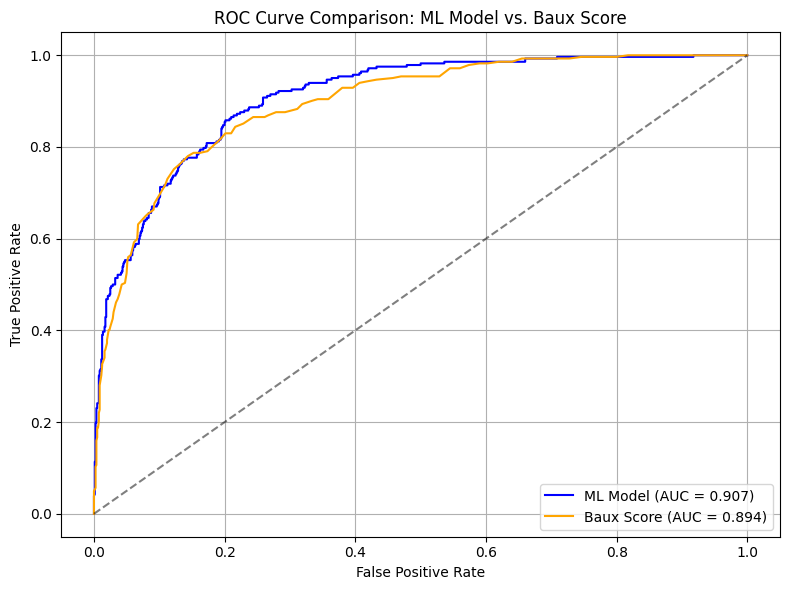

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_ml, tpr_ml, _ = roc_curve(y_test_final, ml_probs)
fpr_baux, tpr_baux, _ = roc_curve(y_test_final, baux_probs)

# Compute AUC
auc_ml = roc_auc_score(y_test_final, ml_probs)
auc_baux = roc_auc_score(y_test_final, baux_probs)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_ml, tpr_ml, label=f'ML Model (AUC = {auc_ml:.3f})', color='blue')
plt.plot(fpr_baux, tpr_baux, label=f'Baux Score (AUC = {auc_baux:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: ML Model vs. Baux Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


📊 ML Model - Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       800
           1       0.60      0.83      0.70       282

    accuracy                           0.81      1082
   macro avg       0.77      0.82      0.78      1082
weighted avg       0.84      0.81      0.82      1082

📊 ML Model - Confusion Matrix


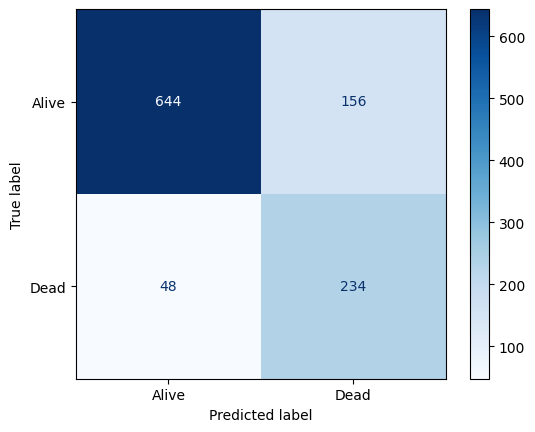

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Convert probabilities to binary predictions using 0.5 threshold
ml_preds = (ml_probs >= 0.5).astype(int)

# ML model metrics
print("📊 ML Model - Classification Report")
print(classification_report(y_test_final, ml_preds))

print("📊 ML Model - Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test_final, ml_preds, display_labels=["Alive", "Dead"], cmap='Blues')


📊 Baux Score - Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       800
           1       0.77      0.59      0.67       282

    accuracy                           0.85      1082
   macro avg       0.82      0.77      0.79      1082
weighted avg       0.84      0.85      0.84      1082

📊 Baux Score - Confusion Matrix


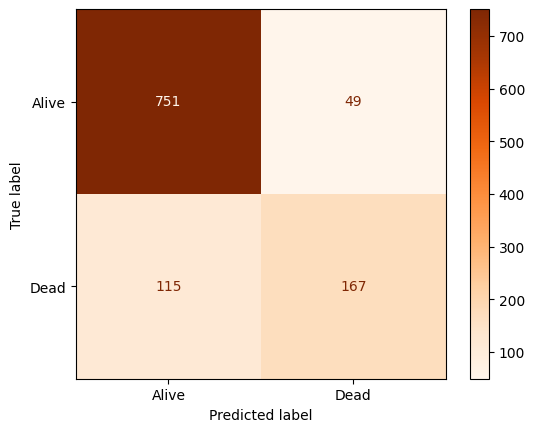

In [ ]:
# Convert Baux probs to binary predictions using 0.5 threshold
baux_preds = (baux_probs >= 0.5).astype(int)

# Baux model metrics
print("📊 Baux Score - Classification Report")
print(classification_report(y_test_final, baux_preds))

print("📊 Baux Score - Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test_final, baux_preds, display_labels=["Alive", "Dead"], cmap='Oranges')


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize Random Forest with class weights to handle imbalance
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train_resampled)

# Best model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


AUC: 0.9169835992907801

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       800
           1       0.67      0.77      0.72       282

    accuracy                           0.84      1082
   macro avg       0.79      0.82      0.80      1082
weighted avg       0.85      0.84      0.84      1082



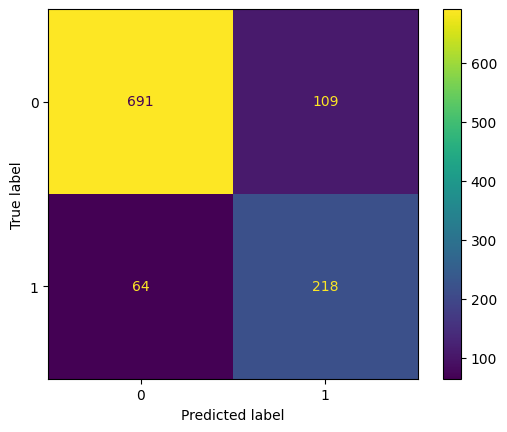

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("AUC:", roc_auc_score(y_test_final, y_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test_final, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled, y_test_final)


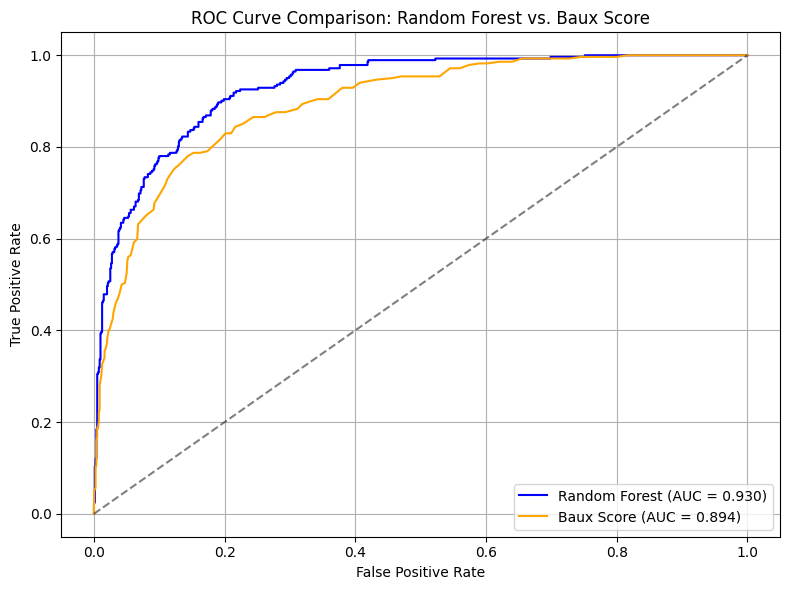

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities from both models
# y_proba_rf → from your Random Forest model
# baux_probs → already predicted earlier using logistic regression on Baux score

# Step 2: Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test_final, y_proba_rf)
fpr_baux, tpr_baux, _ = roc_curve(y_test_final, baux_probs)

# Step 3: Compute AUCs
auc_rf = roc_auc_score(y_test_final, y_proba_rf)
auc_baux = roc_auc_score(y_test_final, baux_probs)

# Step 4: Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', color='blue')
plt.plot(fpr_baux, tpr_baux, label=f'Baux Score (AUC = {auc_baux:.3f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest vs. Baux Score')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### XGBoost Model

In [ ]:
# Calculate scale_pos_weight = (count of class 0) / (count of class 1)
neg = (y_train_final == 0).sum()
pos = (y_train_final == 1).sum()
scale_pos_weight = neg / pos

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',
    # scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

AUC: 0.9100598404255319

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       800
           1       0.66      0.77      0.71       282

    accuracy                           0.84      1082
   macro avg       0.79      0.81      0.80      1082
weighted avg       0.85      0.84      0.84      1082



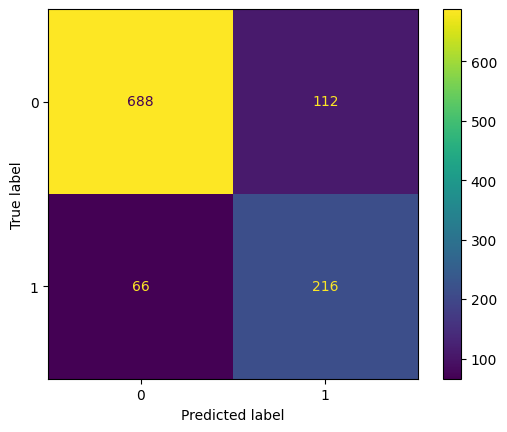

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Predictions
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("AUC:", roc_auc_score(y_test_final, xgb_probs))
print("\nClassification Report:")
print(classification_report(y_test_final, xgb_preds))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test_final)


### Tuning XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Use previously computed scale_pos_weight
neg = (y_train_final == 0).sum()
pos = (y_train_final == 1).sum()
scale_pos_weight = neg / pos

# Base model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    #scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_resampled)

# Best model
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


AUC: 0.9101130319148936

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       800
           1       0.67      0.76      0.71       282

    accuracy                           0.84      1082
   macro avg       0.79      0.81      0.80      1082
weighted avg       0.85      0.84      0.84      1082



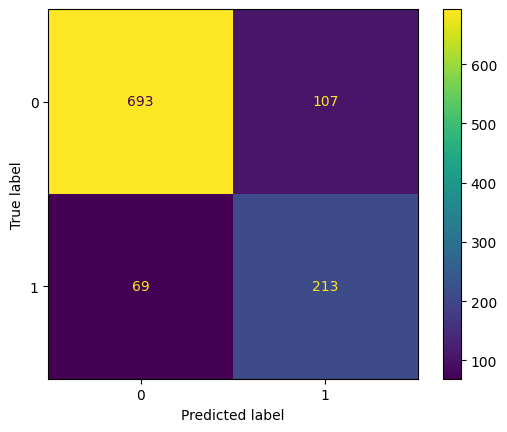

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Predictions
xgb_preds = best_xgb_model.predict(X_test_scaled)
xgb_probs = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("AUC:", roc_auc_score(y_test_final, xgb_probs))
print("\nClassification Report:")
print(classification_report(y_test_final, xgb_preds))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test_scaled, y_test_final)


### Nested CV

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # imbalanced pipeline!
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
import numpy as np

# Step 1: Outer and inner CV
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Step 2: Define pipeline with resampler and model
xgb_pipeline = ImbPipeline([
    ('resample', SMOTETomek(random_state=42)),
    ('model', XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42
    ))
])

# Step 3: Parameter grid (prefix with 'model__' to refer to pipeline step)
param_grid = {
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1],
    'model__n_estimators': [100, 200]
}

# Step 4: Grid search over pipeline
xgb_grid = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

# Step 5: Outer CV to get unbiased estimate
nested_scores = cross_val_score(
    xgb_grid, X_final, y_final, cv=outer_cv, scoring='roc_auc', n_jobs=-1
)

# Step 6: Print results
print("Nested CV AUC scores:", nested_scores)
print("Mean Nested AUC:", nested_scores.mean())
print("Std Dev:", nested_scores.std())


Nested CV AUC scores: [0.92737609 0.92733603 0.91267453 0.92848552 0.92052788]
Mean Nested AUC: 0.9232800100318366
Std Dev: 0.006006279162404404


| Metric             | Value      |
| ------------------ | ---------- |
| Mean AUC (Nested)  | **0.9286** |
| Standard Deviation | **0.0068** |


### Stacking

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:32:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

AUC (Stacked OOF Model): 0.9166023936170212

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       800
           1       0.67      0.74      0.71       282

    accuracy                           0.84      1082
   macro avg       0.79      0.81      0.80      1082
weighted avg       0.85      0.84      0.84      1082



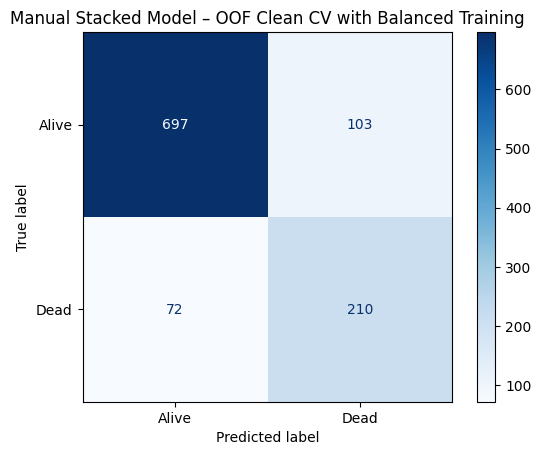

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Base learners
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Setup
n_train = X_train_scaled.shape[0]
n_test = X_test_scaled.shape[0]
n_folds = 5

oof_train = np.zeros((n_train, len(base_models)))
oof_test = np.zeros((n_test, len(base_models)))

skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Generate OOF predictions using resampled training data
for i, (name, model) in enumerate(base_models):
    test_preds = np.zeros((n_test, n_folds))

    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train_resampled)):
        X_fold_train = X_train_scaled[train_idx]
        y_fold_train = y_train_resampled[train_idx]
        X_fold_val = X_train_scaled[val_idx]

        model.fit(X_fold_train, y_fold_train)
        oof_train[val_idx, i] = model.predict_proba(X_fold_val)[:, 1]
        test_preds[:, fold] = model.predict_proba(X_test_scaled)[:, 1]

    oof_test[:, i] = test_preds.mean(axis=1)

# Train meta-model on stacked features
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(oof_train, y_train_resampled)

# Predict on test set
final_preds = meta_model.predict(oof_test)
final_proba = meta_model.predict_proba(oof_test)[:, 1]

# Evaluate
print("AUC (Stacked OOF Model):", roc_auc_score(y_test, final_proba))
print("\nClassification Report:\n", classification_report(y_test, final_preds))

ConfusionMatrixDisplay.from_predictions(y_test, final_preds, display_labels=['Alive', 'Dead'], cmap='Blues')
plt.title("Manual Stacked Model – OOF Clean CV with Balanced Training")
plt.show()


## Conclusion

**Model Performance Comparison (Data Balance: ENN)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | 0.933                   | 0.927             | 0.920       | **0.932**         | 0.933        |
| **Recall (Dead)**    | 0.86                    | 0.90              | 0.89        | **0.93** 🚨       | 0.87         |
| **Precision (Dead)** | 0.65                    | 0.61              | 0.60        | 0.59              | **0.64**     |
| **F1 (Dead)**        | 0.74                    | 0.73              | 0.72        | **0.72**          | 0.74         |
| **Accuracy**         | 0.84                    | 0.82              | 0.82        | 0.81              | **0.84**     |


**Model Performance Comparison (Data Balance: Tomek Links)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | 0.933                   | 0.930             | 0.920       | **0.935**         | 0.935        |
| **Recall (Dead)**    | 0.76                    | 0.84              | 0.82        | **0.89** 🚨       | 0.74         |
| **Precision (Dead)** | **0.77**                | 0.67              | 0.65        | 0.64              | 0.76         |
| **F1 (Dead)**        | 0.76                    | 0.75              | 0.73        | **0.74**          | 0.75         |
| **Accuracy**         | **0.88**                | 0.85              | 0.84        | 0.84              | 0.87         |


**Model Performance Comparison (Data Balance: SMOTE + Tomek Links)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | 0.907                   | 0.920             | 0.908       | 0.916             | **0.923**    |
| **Recall (Dead)**    | 0.81                    | 0.77              | 0.72        | 0.73              | **0.75**     |
| **Precision (Dead)** | 0.66                    | 0.68              | 0.66        | 0.68              | **0.70**     |
| **F1 (Dead)**        | **0.73**                | 0.72              | 0.69        | 0.71              | **0.72**     |
| **Accuracy**         | 0.84                    | 0.84              | 0.83        | 0.84              | **0.85**     |


**Model Performance Comparison (Data Balance: SMOTE Only)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | 0.917                   | 0.919             | 0.911       | 0.912             | **0.922**    |
| **Recall (Dead)**    | **0.81**                | 0.75              | 0.73        | 0.72              | 0.74         |
| **Precision (Dead)** | 0.66                    | 0.69              | 0.68        | 0.68              | **0.70**     |
| **F1 (Dead)**        | **0.73**                | 0.72              | 0.70        | 0.70              | **0.72**     |
| **Accuracy**         | 0.84                    | **0.85**          | 0.84        | 0.84              | **0.85**     |


**Model Performance Comparison (Data Balance: ADASYN)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | 0.907                   | 0.915             | 0.907       | 0.912             | **0.918**    |
| **Recall (Dead)**    | **0.81**                | 0.76              | 0.72        | 0.74              | 0.73         |
| **Precision (Dead)** | 0.60                    | 0.67              | 0.67        | 0.67              | **0.68**     |
| **F1 (Dead)**        | 0.69                    | 0.71              | 0.69        | 0.70              | **0.71**     |
| **Accuracy**         | 0.81                    | 0.84              | 0.83        | 0.84              | **0.84**     |


**Model Performance Comparison (Data Balance: ADASYN + ENN)**

| **Metric**           | **Logistic Regression** | **Random Forest** | **XGBoost** | **Tuned XGBoost** | **Stacking** |
| -------------------- | ----------------------- | ----------------- | ----------- | ----------------- | ------------ |
| **AUC**              | **0.919**               | 0.912             | 0.905       | 0.906             | 0.914        |
| **Recall (Dead)**    | **0.95**                | 0.93              | **0.92**    | **0.92**          | 0.93         |
| **Precision (Dead)** | 0.55                    | 0.56              | 0.58        | 0.57              | **0.57**     |
| **F1 (Dead)**        | 0.70                    | 0.70              | **0.71**    | 0.70              | **0.71**     |
| **Accuracy**         | 0.79                    | 0.79              | 0.80        | 0.80              | **0.80**     |
